In [1]:
#.libPaths("/home/kostyadovnar/CVUT/BI-PRS/packages")
# .libPaths("/home/senyaaa/BI-PRS/packages")
#.libPaths("")

# paths("~/tmp/bi-prs/")
# install.packages('Sleuth2')
#install.packages('lmtest')

library(Sleuth2)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(olsrr)
library(lmtest)
library(car)
options(width=160, repr.plot.width=12, repr.plot.height=8) 

Warning message:
"package 'Sleuth2' was built under R version 4.3.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'gridExtra' was built under R version 4.3.3"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'olsrr' was built under R version 4.3.3"

Attaching package: 'olsrr'


The following object is masked from 'package:datasets':

    rivers


Warning message:
"package 'lmtest' was built under R version 4.3.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.3.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message:
"package 'car' was built under R version 4.3.3"
Loading required package: carData

Warning mess

In [2]:
surname <- "downar"
L <- nchar(surname)
K <- 9
M <- ((K + L) * 47) %% 11 + 1
print(M)

[1] 2


## Základní statistická šetření

Stahneme potřebný dataset. 

In [3]:
data("ex0327", package = "Sleuth2")

data <- ex0327
data

,Country,Life,Income,Type
,<chr>,<dbl>,<dbl>,<fct>
1,Australia,71.0,3426,Industrialized
2,Austria,70.4,3350,Industrialized
3,Belgium,70.6,3346,Industrialized
4,Canada,72.0,4751,Industrialized
5,Denmark,73.3,5029,Industrialized
6,Finland,69.8,3312,Industrialized
7,France,72.3,3403,Industrialized
8,West_Germany,70.3,5040,Industrialized
9,Ireland,70.7,2009,Industrialized


### Stručný popis datasetu

Datový soubor představuje sadu dat obsahující informace o různých zemích, jejichž průměrné délce života, HDP na osobu a kategorii rozvoje. V datovém souboru jsou zastoupeny 29 zemí, včetně průmyslově rozvinutých zemí a zemí, které jsou vývozci ropy. Každý řádek odpovídá jedné zemi a sloupce obsahují informace o jejich charakteristikách. Datový soubor také obsahuje chybějící hodnotu pro délku života v Jihoafrické republice.

Význam jednotlivých atributů:
* **Country**: vektor znaků označující zemi
* **Life**: průměrná délka života (roky)
* **Income**: příjmy v roce 1974 (americké dolary)
* **Type**: proměnná typového faktoru s úrovněmi "Industrialized " a"Petroleum"

Vzhledem k tomu, že Jihoafrická republika nemá hodnotu příjmu, naplníme ji hodnotou z cizího zdroje ([zdroj](https://www.macrotrends.net/global-metrics/countries/ZAF/south-africa/gdp-gross-domestic-product)).

In [4]:
# Nahradíme chybějící hodnotu pro příjem v Jižní Africe hodnotou z jiného zdroje
data[16, "Income"] <- 1650
data$Income <- round(data$Income)
data

,Country,Life,Income,Type
,<chr>,<dbl>,<dbl>,<fct>
1,Australia,71.0,3426,Industrialized
2,Austria,70.4,3350,Industrialized
3,Belgium,70.6,3346,Industrialized
4,Canada,72.0,4751,Industrialized
5,Denmark,73.3,5029,Industrialized
6,Finland,69.8,3312,Industrialized
7,France,72.3,3403,Industrialized
8,West_Germany,70.3,5040,Industrialized
9,Ireland,70.7,2009,Industrialized


### Základní statistiky

In [5]:
# Oddělení dat pro každý typ země
industrialized_countries <- subset(data, Type == "Industrialized")
petroleum_countries <- subset(data, Type == "Petroleum")

# Základní statistiky pro průmyslově rozvinuté země - Life
mean_industrialized_life <- mean(industrialized_countries$Life, na.rm = TRUE)
median_industrialized_life <- median(industrialized_countries$Life, na.rm = TRUE)
sd_industrialized_life <- sd(industrialized_countries$Life, na.rm = TRUE)
min_industrialized_life <- min(industrialized_countries$Life, na.rm = TRUE)
max_industrialized_life <- max(industrialized_countries$Life, na.rm = TRUE)
count_industrialized_life <- length(industrialized_countries$Life)

# Základní statistiky pro země závislé na ropě - Life
mean_petroleum_life <- mean(petroleum_countries$Life, na.rm = TRUE)
median_petroleum_life <- median(petroleum_countries$Life, na.rm = TRUE)
sd_petroleum_life <- sd(petroleum_countries$Life, na.rm = TRUE)
min_petroleum_life <- min(petroleum_countries$Life, na.rm = TRUE)
max_petroleum_life <- max(petroleum_countries$Life, na.rm = TRUE)
count_petroleum_life <- length(petroleum_countries$Life)

# Základní statistiky pro průmyslově rozvinuté země - Income
mean_industrialized_income <- mean(industrialized_countries$Income, na.rm = TRUE)
median_industrialized_income <- median(industrialized_countries$Income, na.rm = TRUE)
sd_industrialized_income <- sd(industrialized_countries$Income, na.rm = TRUE)
min_industrialized_income <- min(industrialized_countries$Income, na.rm = TRUE)
max_industrialized_income <- max(industrialized_countries$Income, na.rm = TRUE)
count_industrialized_income <- length(industrialized_countries$Income)

# Základní statistiky pro země závislé na ropě - Income
mean_petroleum_income <- mean(petroleum_countries$Income, na.rm = TRUE)
median_petroleum_income <- median(petroleum_countries$Income, na.rm = TRUE)
sd_petroleum_income <- sd(petroleum_countries$Income, na.rm = TRUE)
min_petroleum_income <- min(petroleum_countries$Income, na.rm = TRUE)
max_petroleum_income <- max(petroleum_countries$Income, na.rm = TRUE)
count_petroleum_income <- length(petroleum_countries$Income)

# Vytvoření tabulky pro základní statistiky
basic_stats <- data.frame(
  Statistic = c("Mean", "Median", "Standard deviation", "Minimum", "Maximum", "Observations"),
  Life_Industr = c(mean_industrialized_life, median_industrialized_life, sd_industrialized_life, min_industrialized_life, max_industrialized_life, count_industrialized_life),
  Life_Petrol = c(mean_petroleum_life, median_petroleum_life, sd_petroleum_life, min_petroleum_life, max_petroleum_life, count_petroleum_life),
  Income_Industr = c(mean_industrialized_income, median_industrialized_income, sd_industrialized_income, min_industrialized_income, max_industrialized_income, count_industrialized_income),
  Income_Petrol = c(mean_petroleum_income, median_petroleum_income, sd_petroleum_income, min_petroleum_income, max_petroleum_income, count_petroleum_income)  
)

# Okrouhlení číselných sloupců na 2 desetinná místa
basic_stats <- basic_stats %>%
  mutate_if(is.numeric, ~round(., digits = 2))

# Výpis tabulky
print(basic_stats)

           Statistic Life_Industr Life_Petrol Income_Industr Income_Petrol
1               Mean        71.47       49.98        3518.75        966.67
2             Median        71.20       50.70        3376.50        560.00
3 Standard deviation         1.77        8.05        1267.27        924.64
4            Minimum        68.10       36.90         956.00        110.00
5            Maximum        74.70       66.40        5596.00       3010.00
6       Observations        20.00        9.00          20.00          9.00


* Průměr (Mean):
    * Průměrná délka života v průmyslově rozvinutých zemích je vyšší než v zemích závislých na ropě. Tento rozdíl může být způsoben lepšími sociálními a zdravotními podmínkami, které existují v průmyslově rozvinutých zemích a umožňují obyvatelům žít déle.
    * Průměrný příjem na obyvatele v průmyslově rozvinutých zemích je výrazně vyšší než v zemích závislých na ropě. To může být důsledek vyšší úrovně ekonomického rozvoje, většího zaměstnaností a vyšší produktivity práce v průmyslově rozvinutých zemích.


* Medián (Median):
    * Medián délky života a příjmu na obyvatele poskytuje informace o střední hodnotě v datasetu, které nejsou ovlivněny extrémními hodnotami. Různé hodnoty mediánu v průmyslově rozvinutých zemích a zemích závislých na ropě mohou být důsledkem rozdílů v distribuci dat a míře koncentrace hodnot kolem střední hodnoty.


* Standardní odchylka (Standard deviation):
    * Vyšší standardní odchylka délky života ve zemích závislých na ropě naznačuje větší variabilitu v tomto ukazateli mezi těmito zeměmi. To může být způsobeno různými socioekonomickými faktory, jako jsou dostupnost zdravotní péče, životní podmínky a infrastruktura.
    * Standardní odchylka příjmu na obyvatele je vyšší průmyslově rozvinutých zemích, což může být důsledkem rozdílů v ekonomickém rozvoji, příjmové nerovnosti a diverzifikace ekonomiky.

Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4."


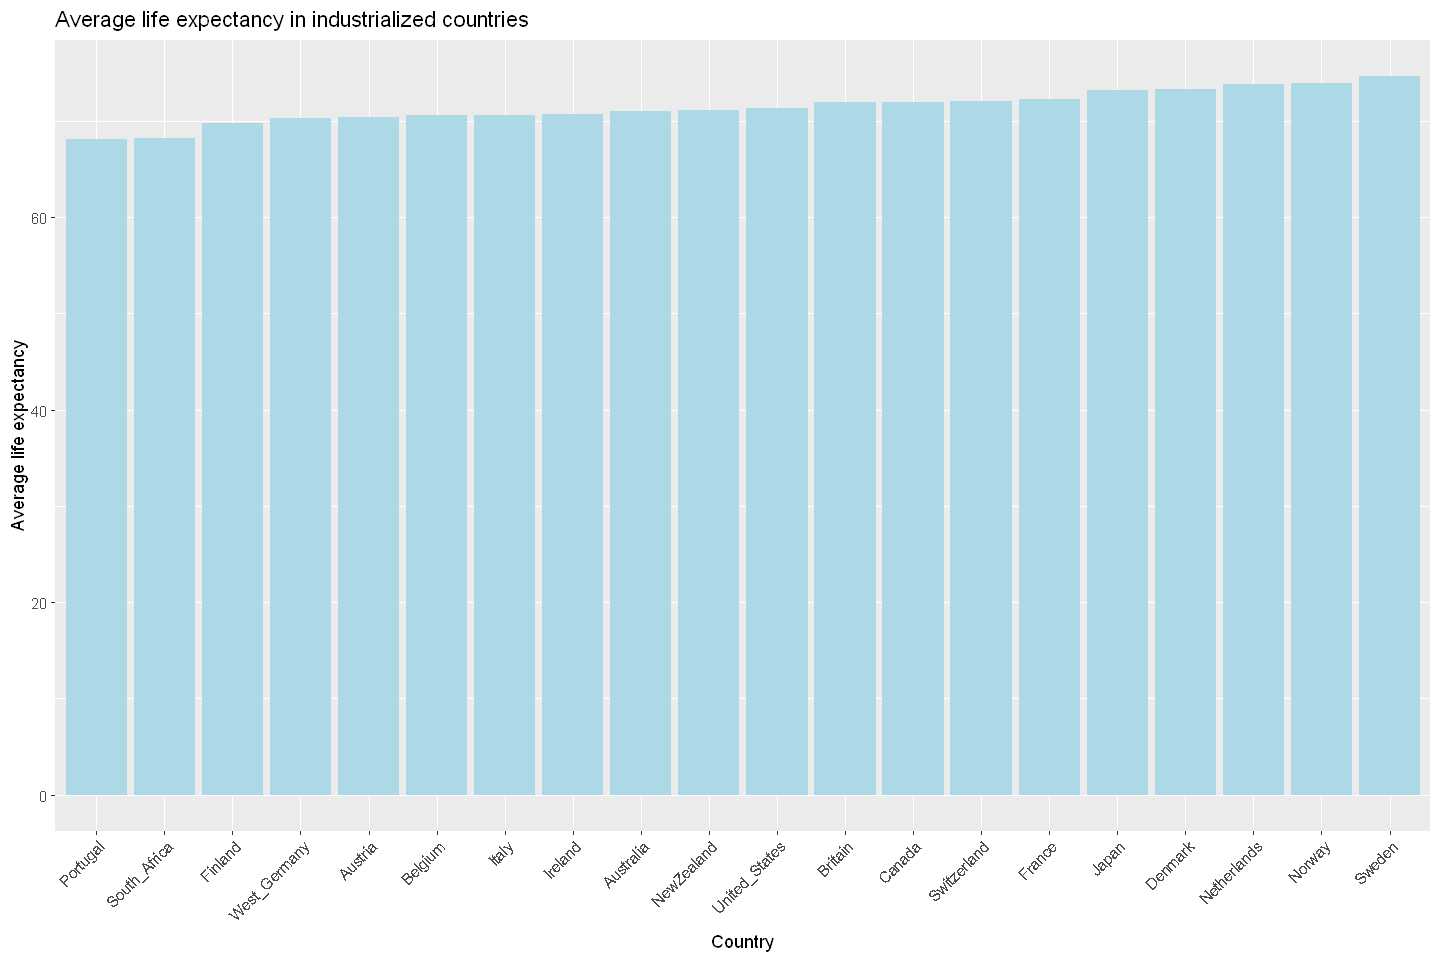

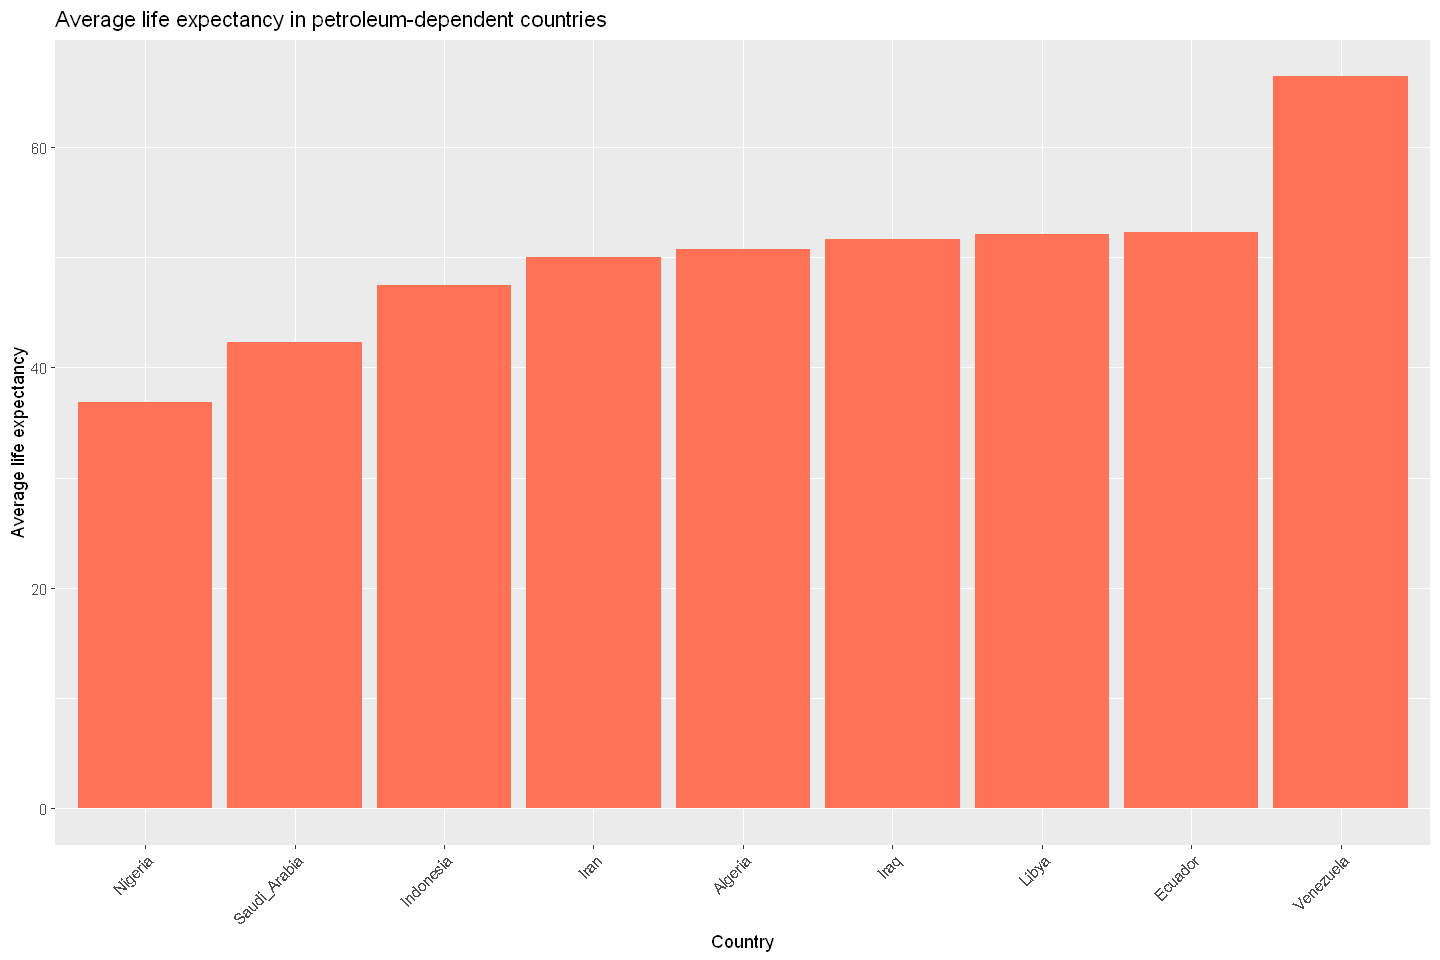

In [6]:
# Průměrná délka života v průmyslově rozvinutých zemích
ggplot(industrialized_countries, aes(x = reorder(Country, Life), y = Life, fill = "lightblue")) +
  geom_bar(stat = "identity") +
  labs(title = "Average life expectancy in industrialized countries", x = "Country", y = "Average life expectancy") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = "lightblue") +
  guides(fill = FALSE)

# Průměrná délka života ve zemích závislých na ropě
ggplot(petroleum_countries, aes(x = reorder(Country, Life), y = Life, fill = "lightgreen")) +
  geom_bar(stat = "identity") +
  labs(title = "Average life expectancy in petroleum-dependent countries", x = "Country", y = "Average life expectancy") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = "coral1") +
  guides(fill = FALSE)

* Můžeme si všimnout zajímavé skutečnosti: nejvyšší průměrná délka života mezi zeměmi typu **Petroleum** je pod nejhorším ukazatelem mezi zeměmi typu **Industrialized**.

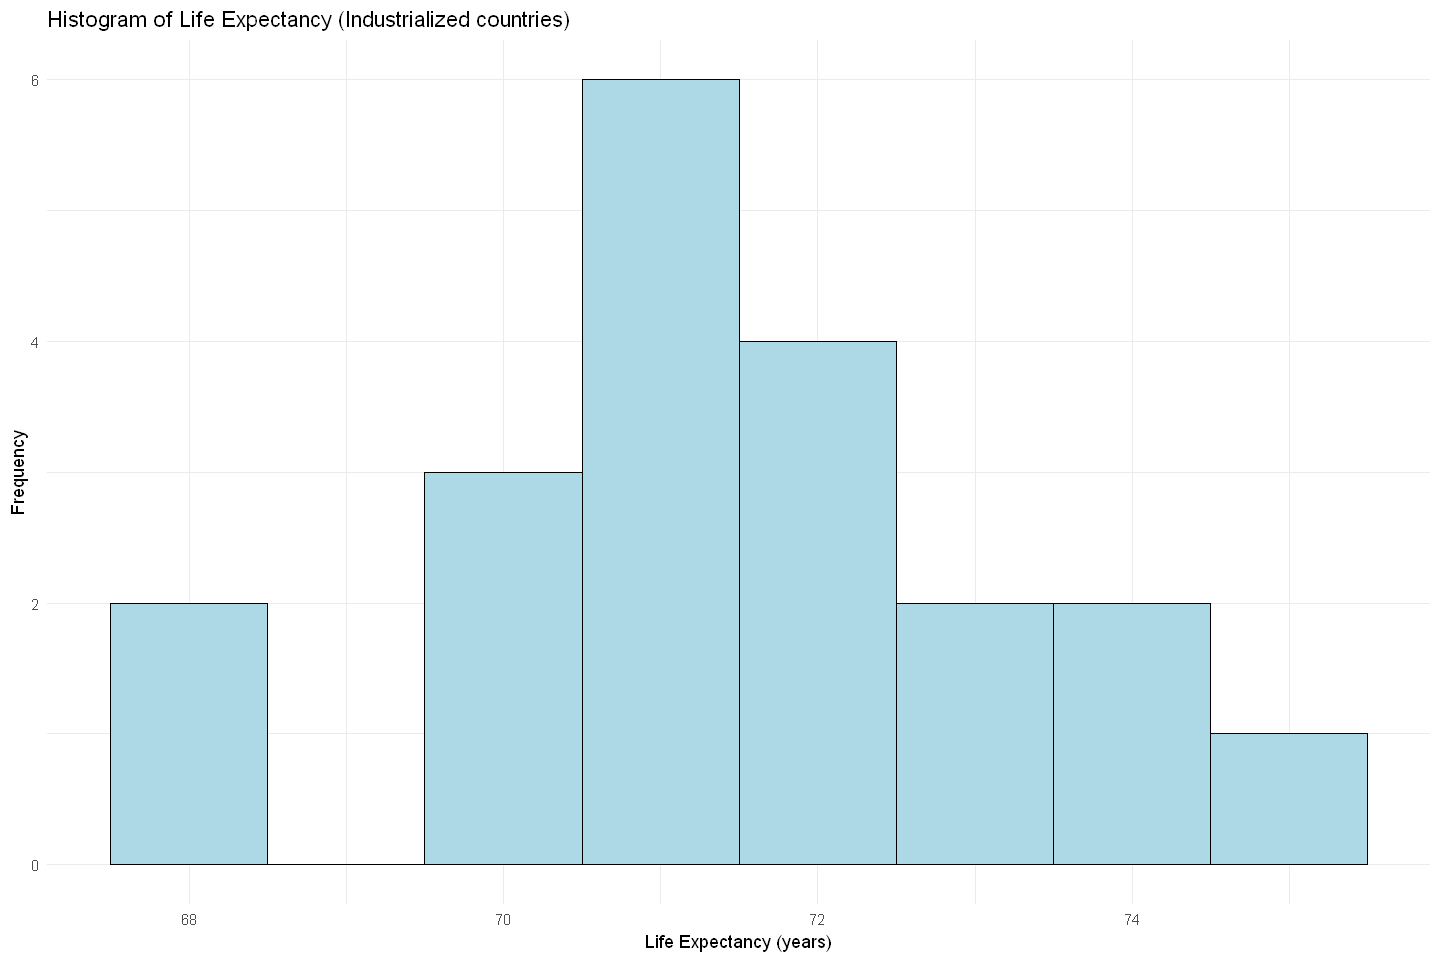

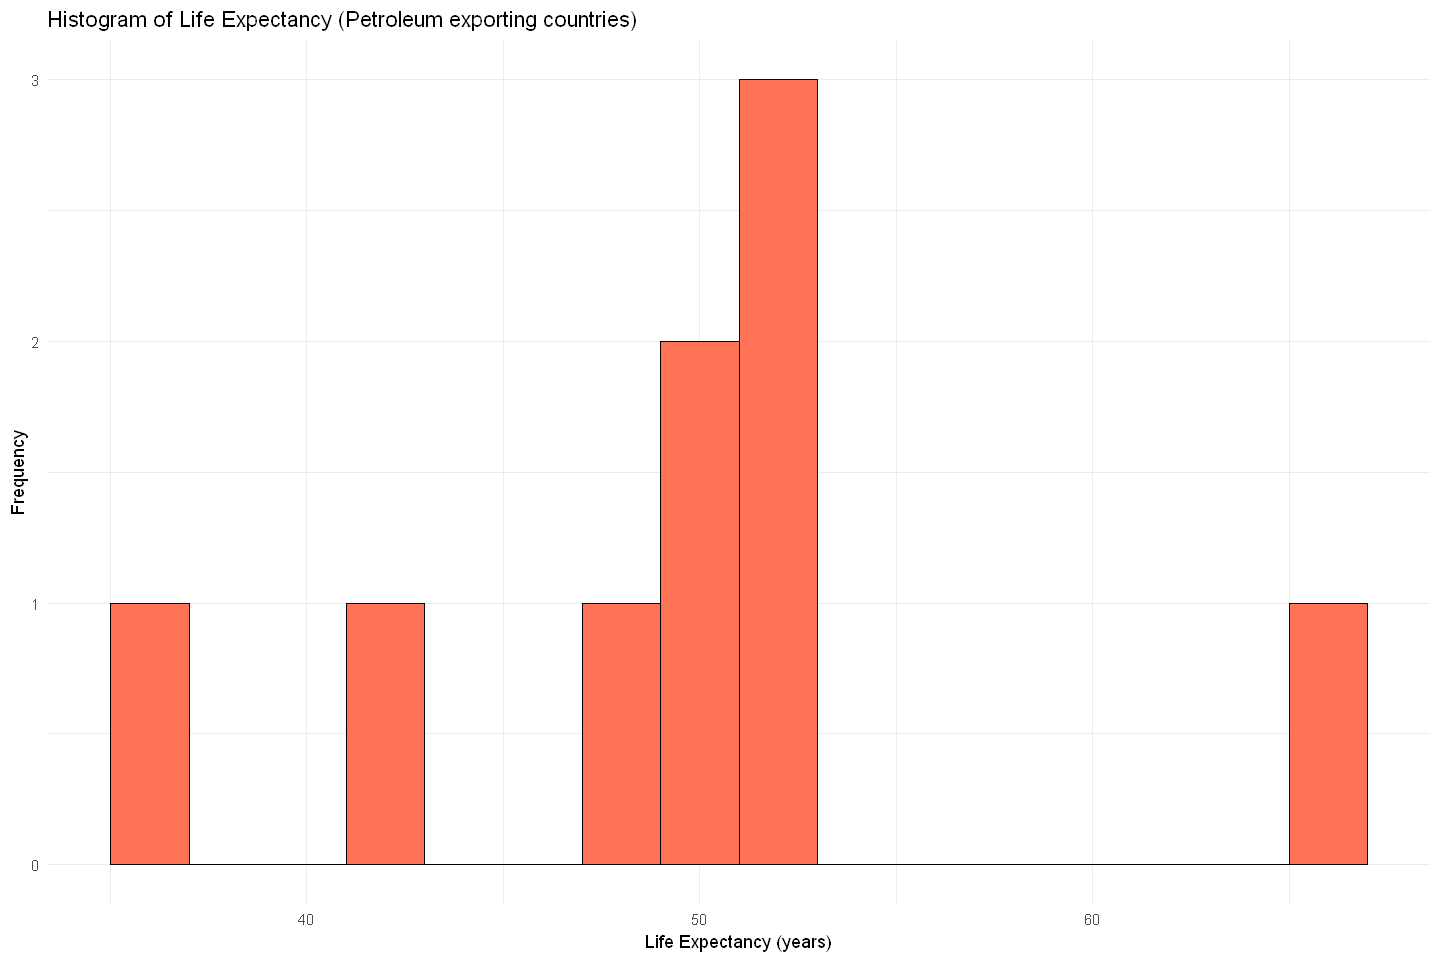

In [7]:
# Vytvořte histogram pro atribut "Life" (průmyslové země)
ggplot(data = industrialized_countries, aes(x = Life)) +
  geom_histogram(binwidth = 1, fill = "lightblue", color = "black") +
  labs(title = "Histogram of Life Expectancy (Industrialized countries)",
       x = "Life Expectancy (years)",
       y = "Frequency") +
  theme_minimal()

# Vytvořte histogram pro atribut "Life" (země vyvážející ropu)
ggplot(data = petroleum_countries, aes(x = Life)) +
  geom_histogram(binwidth = 2, fill = "coral1", color = "black") +
  labs(title = "Histogram of Life Expectancy (Petroleum exporting countries)",
       x = "Life Expectancy (years)",
       y = "Frequency") +
  theme_minimal()

Na základě údajů z histogramů lze předpokládat, že vysvětlená proměnná pro konkrétní typ země může mít normální rozdělení.

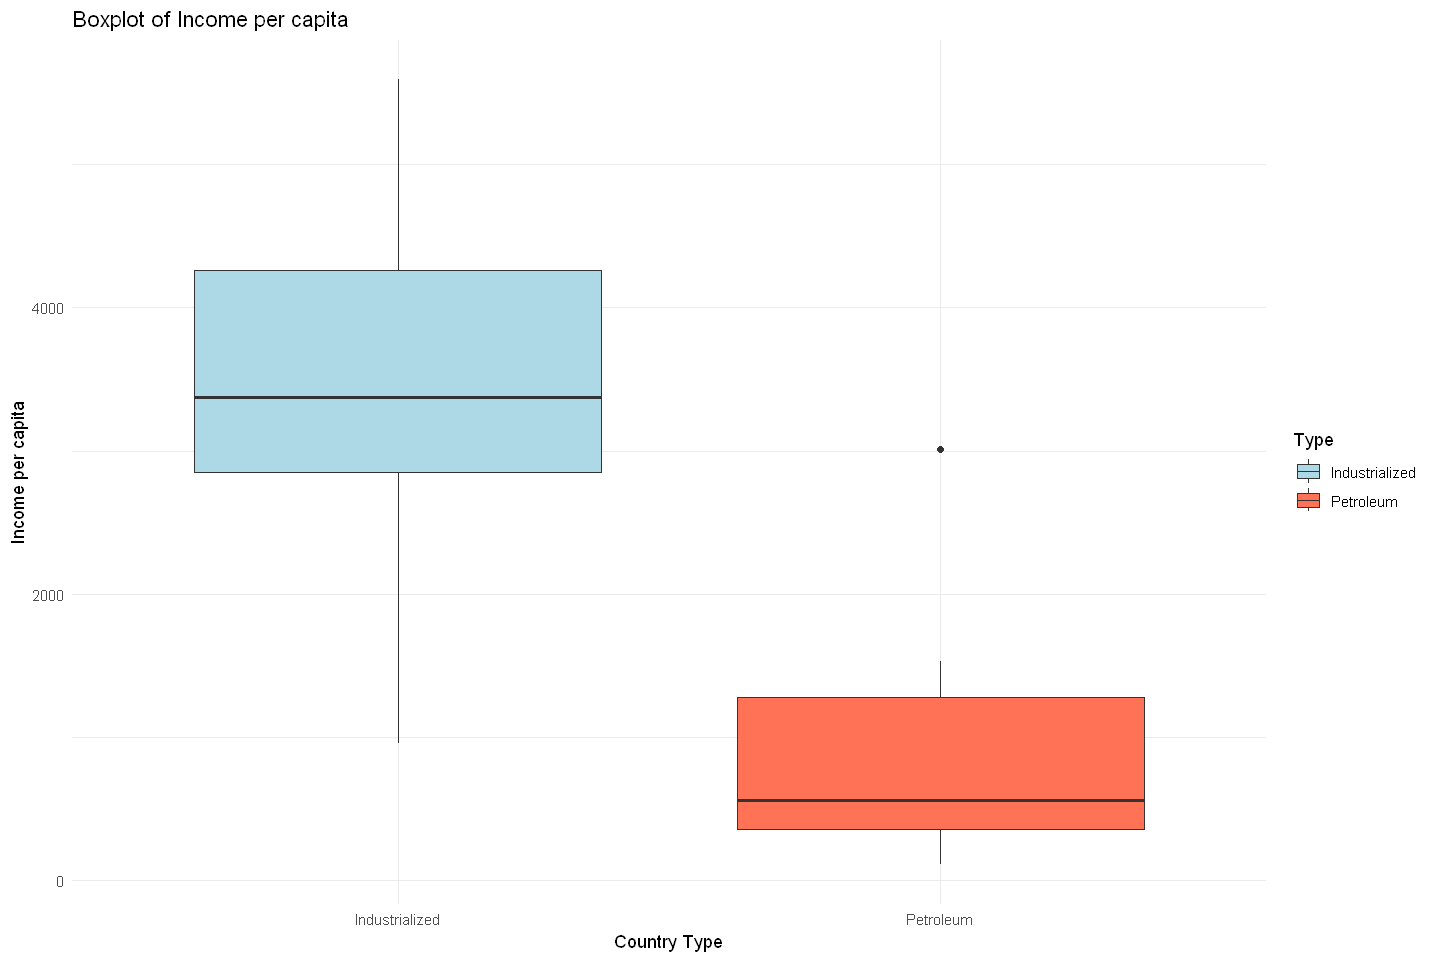

In [8]:
# Boxplot příjmů na obyvatele
ggplot(data, aes(x = Type, y = Income, fill = Type)) +
  geom_boxplot() +
  labs(title = "Boxplot of Income per capita",
       x = "Country Type",
       y = "Income per capita") +
  scale_fill_manual(values = c("lightblue", "coral1"), 
                    breaks = c("Industrialized", "Petroleum"), 
                    labels = c("Industrialized", "Petroleum")) + 
  theme_minimal()

Tento graf opět ukazuje, jak silná je propast mezi průmyslově vyspělými zeměmi a zeměmi závislými na ropě.

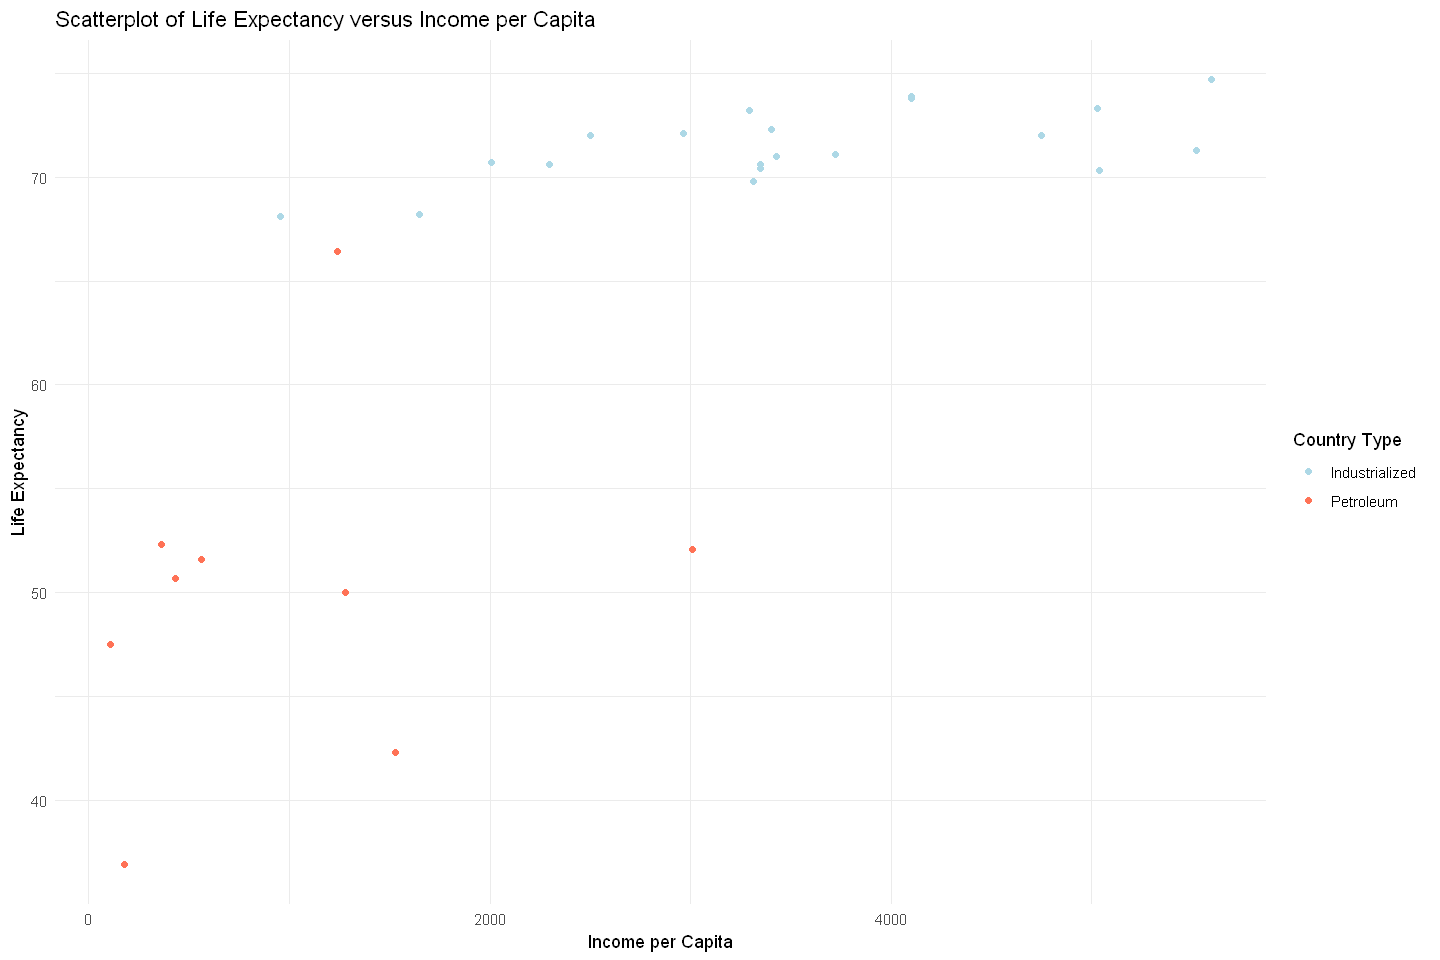

In [9]:
# Scatterplot délky života versus příjmu na obyvatele
ggplot(data, aes(x = Income, y = Life, color = Type)) +
  geom_point() +
  labs(title = "Scatterplot of Life Expectancy versus Income per Capita",
       x = "Income per Capita",
       y = "Life Expectancy",
       color = "Country Type") +
  scale_color_manual(values = c("Industrialized" = "lightblue", "Petroleum" = "coral1")) +
  theme_minimal()

Tento graf označuje závislost, která bude hlavním tématem v příštím úkolu.

## Zkoumání numerického regresoru

Vzhledem k tomu, že průměrný příjem je jediným numerickým atributem v našem datasetu, nemáme jinou možnost než si jej vybrat.

Z předchozího grafu je patrné, že hodnota průměrné délky života roste s rostoucím průměrným příjmem, což je vcelku logické.

* Nyní pokusíme rovnou vložit regresní polynom do dat na obrázku.
* Zkusíme více různých variant modelu.

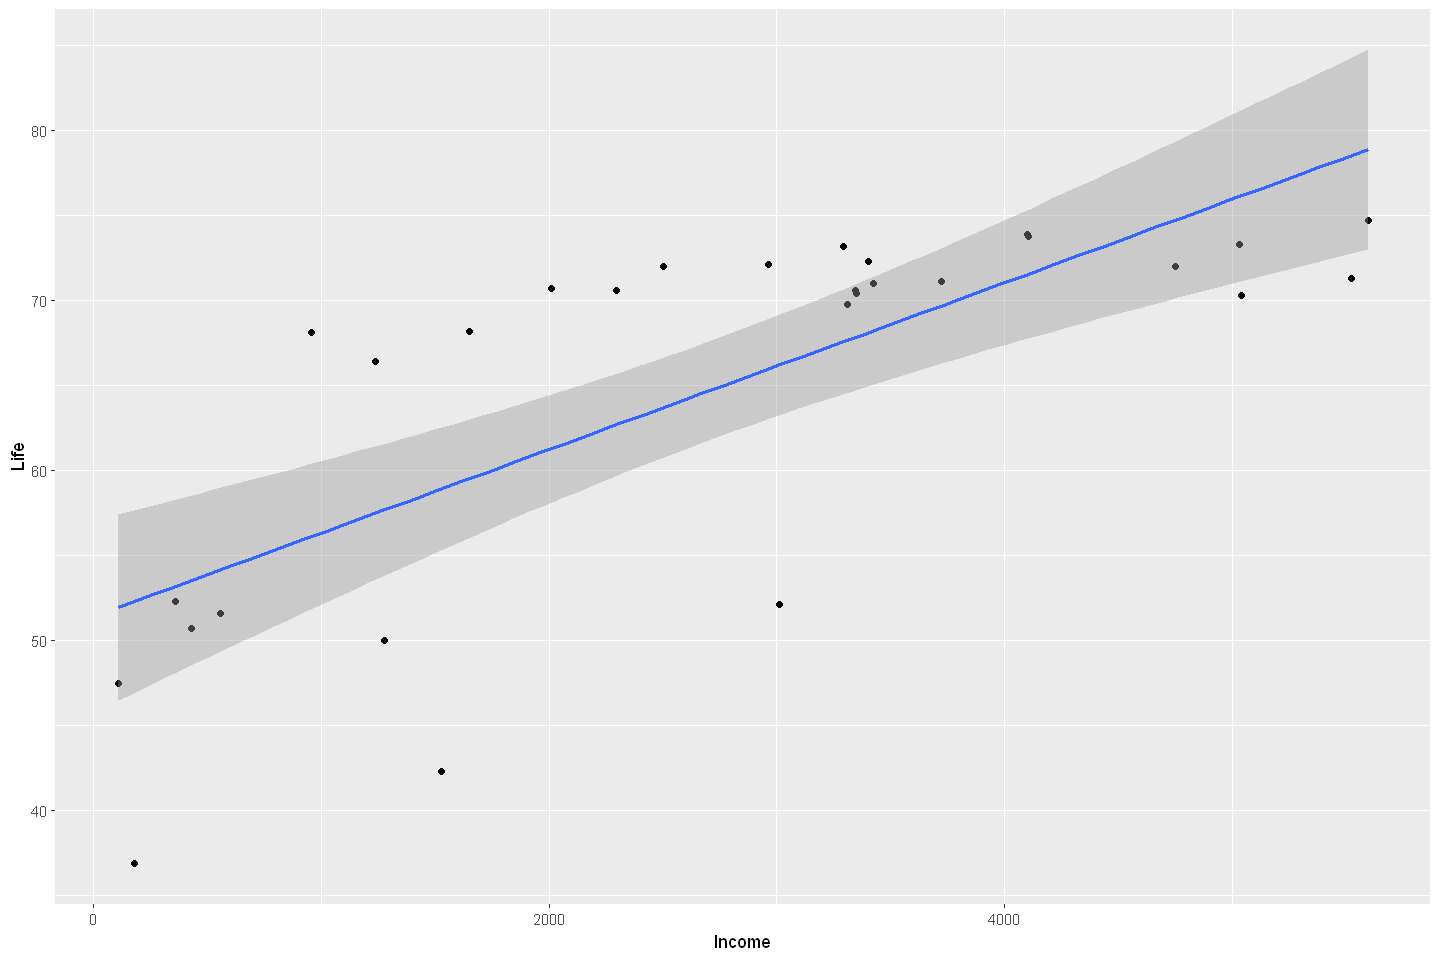

In [10]:
# Life = Intercept + Income
ggplot(data, aes(x=Income, y=Life)) +
    geom_point() +
    stat_smooth(method="lm", formula=y~x)

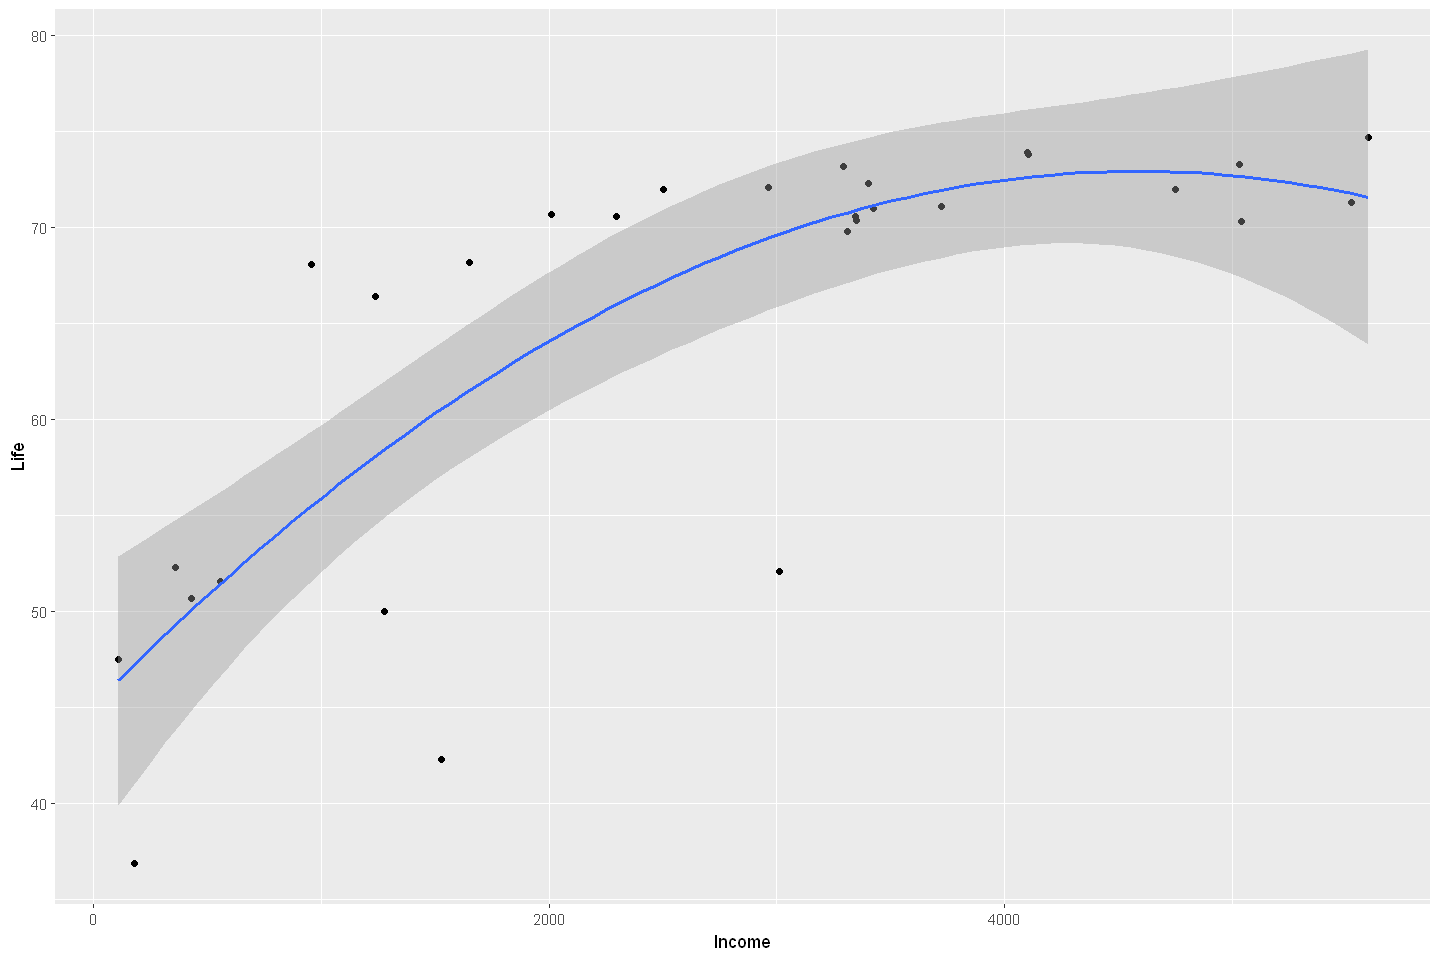

In [11]:
# Life = Intercept + Income + Income^2
ggplot(data, aes(x=Income, y=Life)) +
    geom_point() +
    stat_smooth(method="lm", formula=y~x + I(x^2))

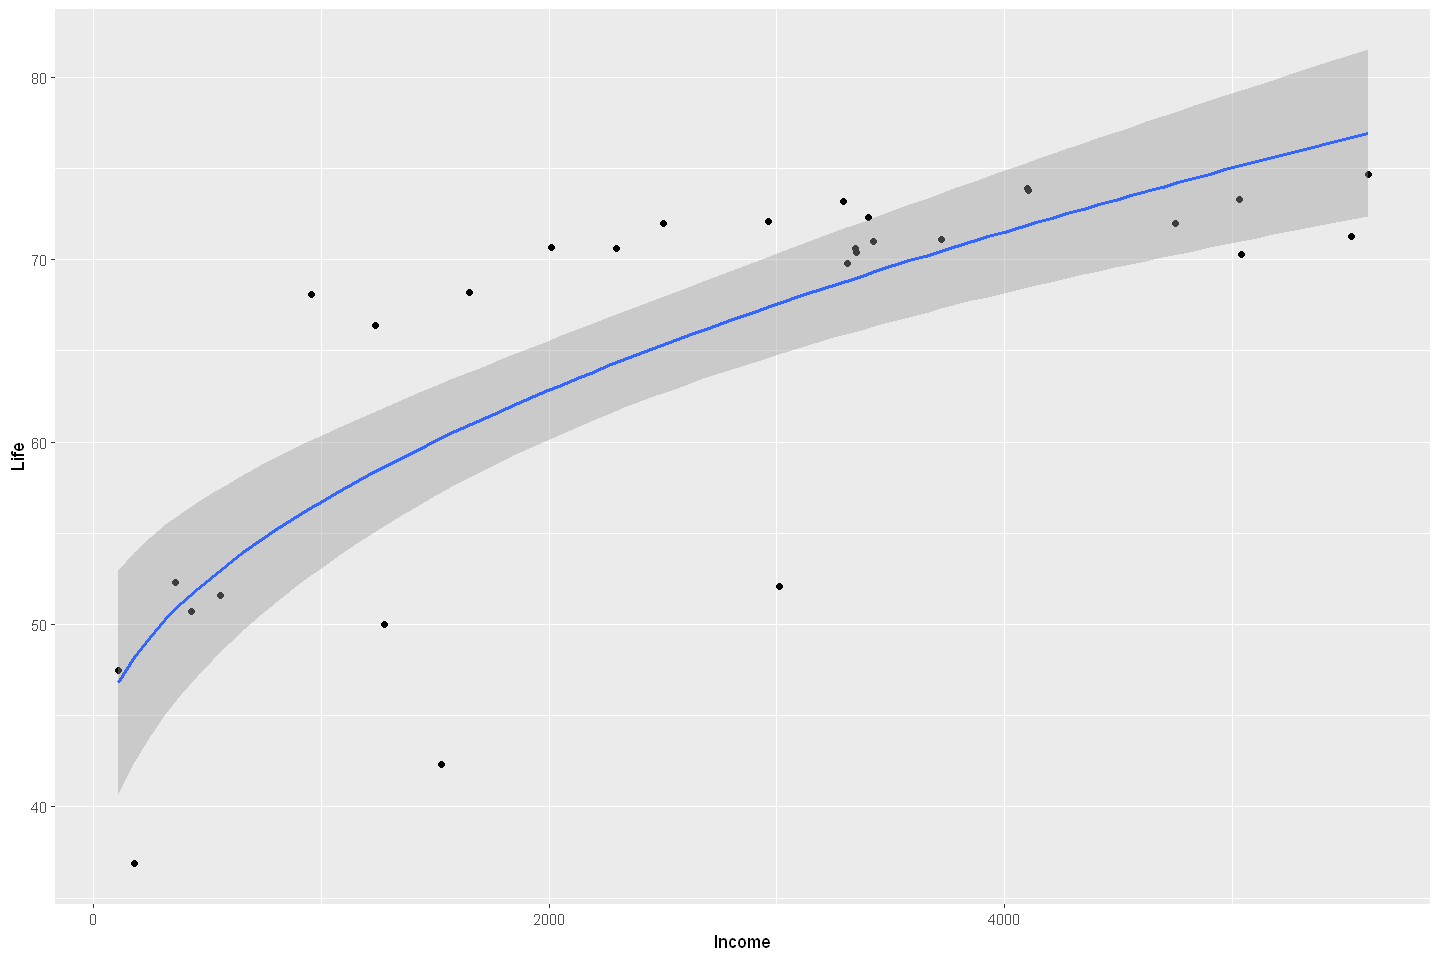

In [12]:
# Life = Intercept + sqrt(Income)
ggplot(data, aes(x=Income, y=Life)) +
    geom_point() +
    stat_smooth(method="lm", formula=y~sqrt(x))

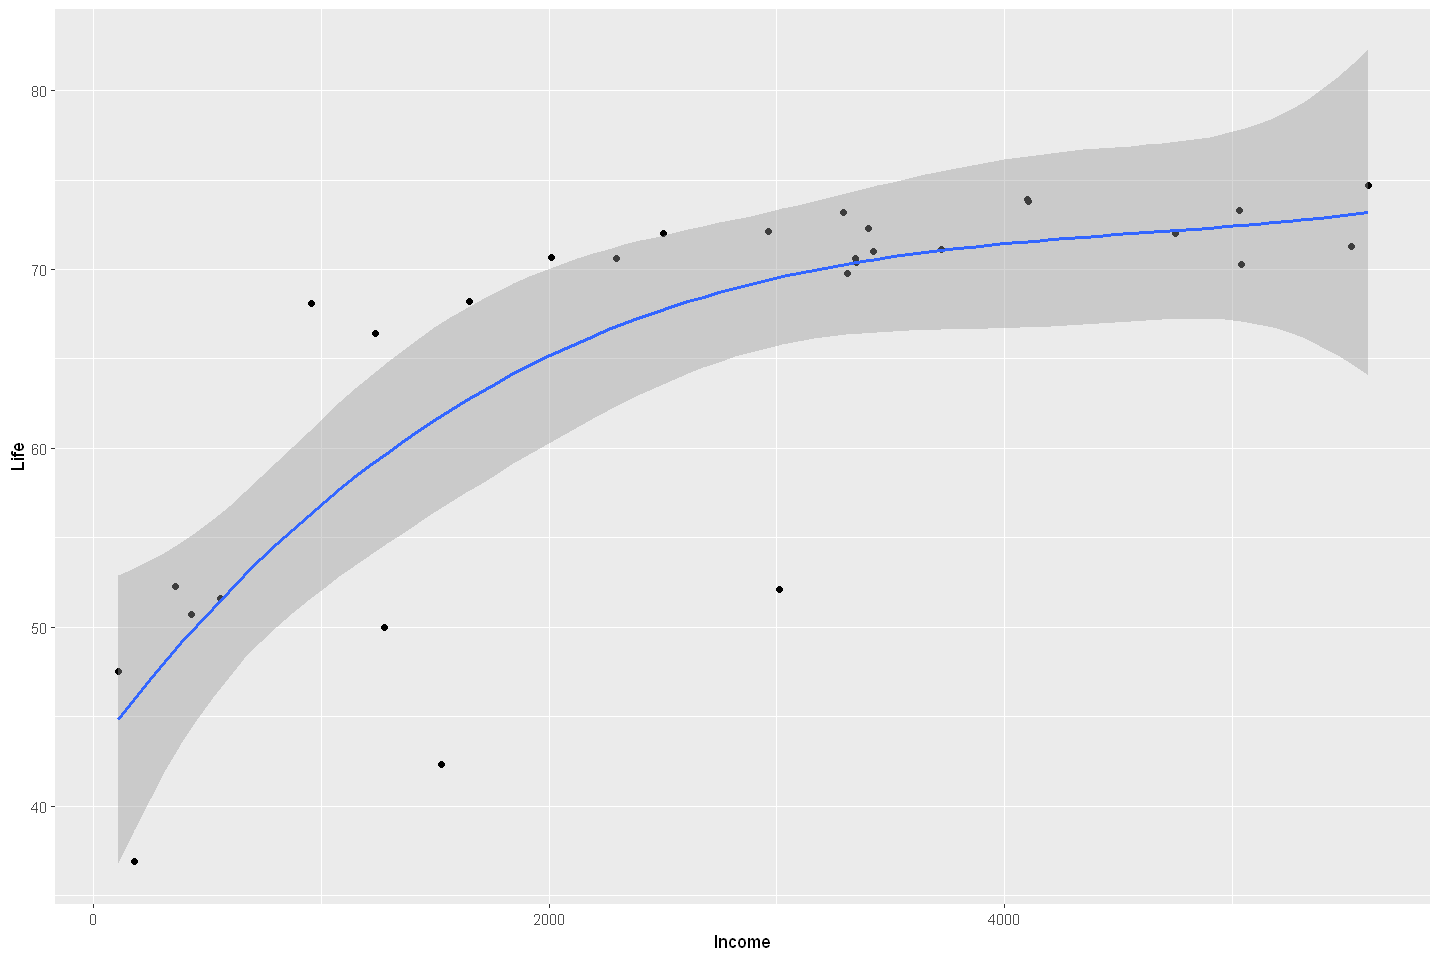

In [13]:
# Life = Intercept + Income + Income^2 + Income^3
ggplot(data, aes(x=Income, y=Life)) +
    geom_point() +
    stat_smooth(method="lm", formula=y~x + I(x^2) + I(x^3))

* Poslední možnost vypadá lépe než všechny ostatní, protože poměrně přirozeně naznačuje závislost mezi průměrným příjmem a průměrnou délkou života.
* Poukazuje na to, jak s rostoucím průměrným příjmem roste průměrná délka života.
* Na základě těchto pozorování lze usoudit, že graf prokazuje pozitivní vztah mezi příjmem a délkou života.
* Jak ukazuje graf, s rostoucím příjmem se průměrná délka života zvyšuje. Tento trend je očekávaný, protože vyšší příjem obvykle umožňuje lidem život v lepších podmínkách, což vede k delšímu životu.
* Přímka však neroste příliš rychle, což zas odpovídá realitě (lidé bohužel nebo naštěstí nežijí 150 let).

Nyní můžeme nafitovat model (odhadnout parametry) a připravit predikce, abychom v budoucnu vykreslili predikční interval modelu.

In [14]:
fit <- lm(Life ~ Income + I(Income^2) + I(Income^3), data=data)
tmp <- predict(fit, interval="prediction")
predict <- cbind(data, tmp)
predict$Type = NULL
predict

Warning message in predict.lm(fit, interval = "prediction"):
"predictions on current data refer to _future_ responses
"


,Country,Life,Income,fit,lwr,upr
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Australia,71.0,3426,70.54741,55.68414,85.41068
2,Austria,70.4,3350,70.39145,55.55013,85.23278
3,Belgium,70.6,3346,70.38294,55.54270,85.22319
4,Canada,72.0,4751,72.17383,57.04672,87.30094
5,Denmark,73.3,5029,72.44138,57.18474,87.69801
6,Finland,69.8,3312,70.30936,55.47789,85.14082
7,France,72.3,3403,70.50134,55.64501,85.35768
8,West_Germany,70.3,5040,72.45273,57.18582,87.71964
9,Ireland,70.7,2009,65.20809,50.10936,80.30683


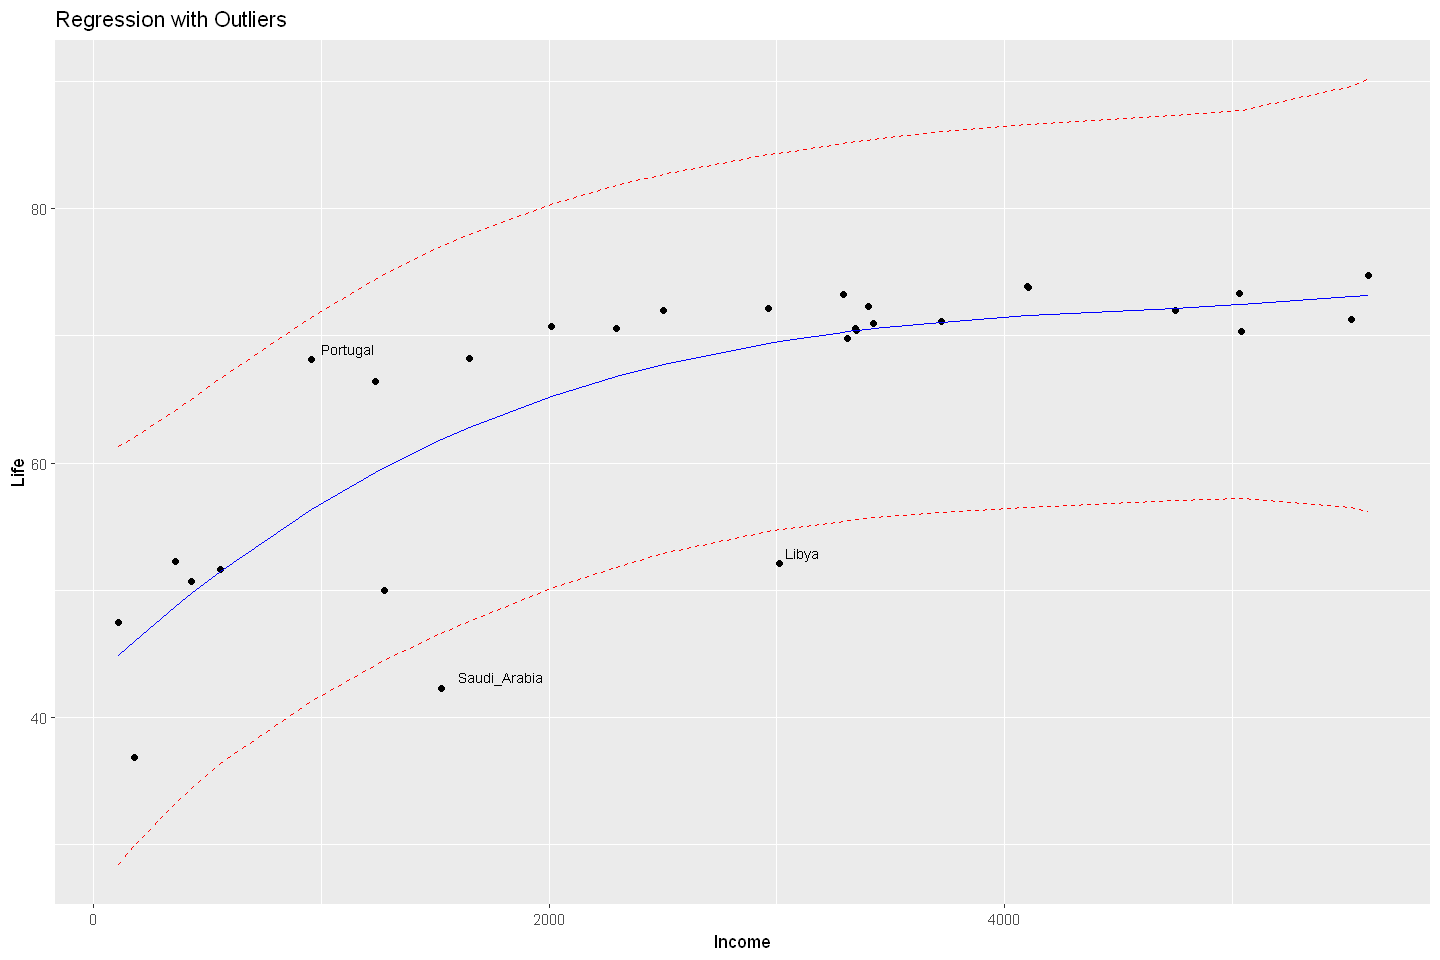

In [15]:
# Calculate distances from each point to the regression line
predict <- predict %>%
  mutate(residual = Life - fit)

# Sort points by decreasing distance
predict <- predict %>%
  arrange(desc(abs(residual)))

# Select top 3 outliers with largest distances
top_3_outliers <- head(predict, 3)

# Create the plot with points and model lines
ggplot(predict, aes(x = Income, y = Life)) +
  geom_point() +
  geom_line(aes(y = fit), color = "blue") +
  geom_line(aes(y = lwr), color = "red", linetype = "dashed") +
  geom_line(aes(y = upr), color = "red", linetype = "dashed") +
  # Add labels to the selected points
  geom_text(data = top_3_outliers, aes(label = Country), hjust = -0.2, vjust = -0.5, size = 3, color = "black") +
  labs(title = "Regression with Outliers", x = "Income", y = "Life")


* Z grafu vyplývá, že poměrně hodně bodů leží relativně daleko od přímky, což nám nehraje do karet.
* Také na grafu jsou podepsány země, které jsou nejdále od přímky (Portugal, Libya, Saudi Arabia). 

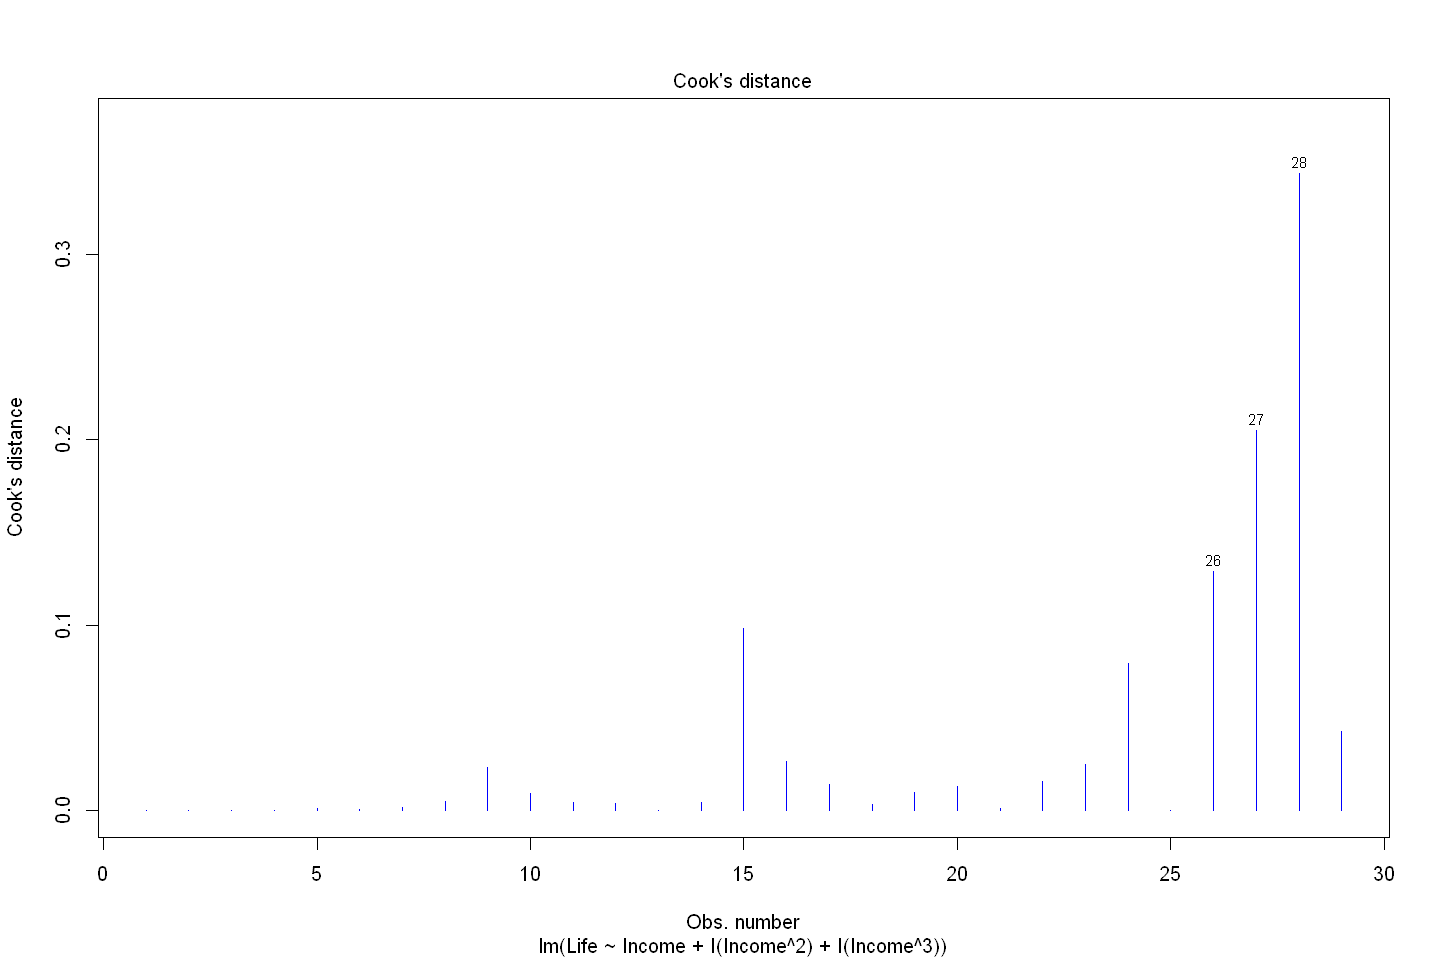

In [16]:
plot(fit, which=4, col=c("blue"))

* Tento graf popisuje Cookovou vzdálenost, která indikuje míru vlivu jednotlivých pozorování na hodnoty odhadů parametrů modelu.
* Vyjadřuje také outlaery, které silně ovlivňují hodnoty parametrů modelu ("silně táhnou přímku směrem k sobě") a tím mohou výrazně zhoršit model. 

In [17]:
summary(fit)


Call:
lm(formula = Life ~ Income + I(Income^2) + I(Income^3), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.5245  -0.1738   0.9768   2.9350  11.7572 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.302e+01  4.574e+00   9.406 1.09e-09 ***
Income       1.705e-02  7.685e-03   2.218   0.0359 *  
I(Income^2) -3.494e-06  3.202e-06  -1.091   0.2857    
I(Income^3)  2.520e-10  3.674e-10   0.686   0.4991    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.94 on 25 degrees of freedom
Multiple R-squared:  0.6505,	Adjusted R-squared:  0.6086 
F-statistic: 15.51 on 3 and 25 DF,  p-value: 6.628e-06


=====================================================================================
1. Odhady regresních koeficientů:
    * Intercept ((Intercept)): Odhadovaná hodnota délky života, když příjem na obyvatele = 0, je přibližně 43.02.
    * Příjem na obyvatele (Income): S p-hodnotou koeficientu příjmu (p = 0,036), která je nižší než konvenční úroveň významnosti (0,05), existuje statisticky významný vztah mezi příjmem na obyvatele a očekávanou délkou života.
    * Kvadratický člen příjmu (I(Income^2)): Koeficient kvadratického členu příjmu není statisticky významný (p = 0.29), což naznačuje, že kvadratický vliv příjmu na délku života není podstatný.
    * Kubický člen příjmu (I(Income^3)): Koeficient kubického členu příjmu také není statisticky významný (p = 0.50), což naznačuje, že kubický vliv příjmu na délku života není podstatný.

2. Kvalita modelu:
    * Rozptyl reziduí: Standardní chyba reziduí je přibližně 6.94.
    * R-squared a Adjusted R-squared: Model vysvětluje přibližně 65.05% variace v délce života. Adjusted R-squared, který bere v úvahu počet prediktorů, je přibližně 60.86%.
    * F-statistic: F-statistika pro celkový model je 15.51 s p-hodnotou 6.628e-06, což naznačuje, že aspoň jeden z regresních koeficientů není nulový.

3. Statistická významnost:
    * Intercept a příjem na obyvatele jsou statisticky významné na hladině významnosti 0.05.
    * Kvadratický a kubický člen příjmu nejsou statisticky významné na hladině významnosti 0.05.

In [18]:
fit <- lm(Life ~ Income + I(Income^2), data=data)
summary(fit)


Call:
lm(formula = Life ~ Income + I(Income^2), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.2607  -0.8426   0.6428   3.0196  12.6206 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.508e+01  3.413e+00  13.210 4.84e-13 ***
Income       1.214e-02  2.792e-03   4.349 0.000187 ***
I(Income^2) -1.324e-06  4.907e-07  -2.697 0.012110 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.869 on 26 degrees of freedom
Multiple R-squared:  0.6439,	Adjusted R-squared:  0.6166 
F-statistic: 23.51 on 2 and 26 DF,  p-value: 1.478e-06


=====================================================================================

Po odstranění kubického členu z modelu došlo ke změně výsledků následovně:

* Koeficienty: Koeficienty pro Příjem a Příjem^2 zůstaly v modelu. Nicméně koeficient pro Příjem^2 se stal statisticky významným (p = 0.012), zatímco koeficient pro Příjem zůstal významný (p = 0.0002).

* Hodnota R-kvadrátu: Hodnota R-kvadrátu zůstala téměř nezměněna (0.6439 po odstranění kubického členu ve srovnání s 0.6505 před odstraněním).

* F-statistika a p-hodnota: Hodnota F-statistiky se zvýšila, což naznačuje, že model je významnější.

Tím, že jsme se zbavili kubického člena, jsme model trochu vylepšili, ale stále nemohu nazvat tento model v našem případě opravdu dobrým. Chyby předpovědi jsou dostatečně velké, dataset má málo dat a jsou přítomny outliery, takže je třeba ještě zapracovat pro získání lepšího modelu.

## Zkoumání kategorického regresoru

Vykresleme histogram pro Life dohromady i zvlášť v závislosti na jednotlivých typech zemí.

Stejně jak u boxplotu vidíme silnou je propast mezi průmyslově vyspělými zeměmi a zeměmi závislými na ropě.

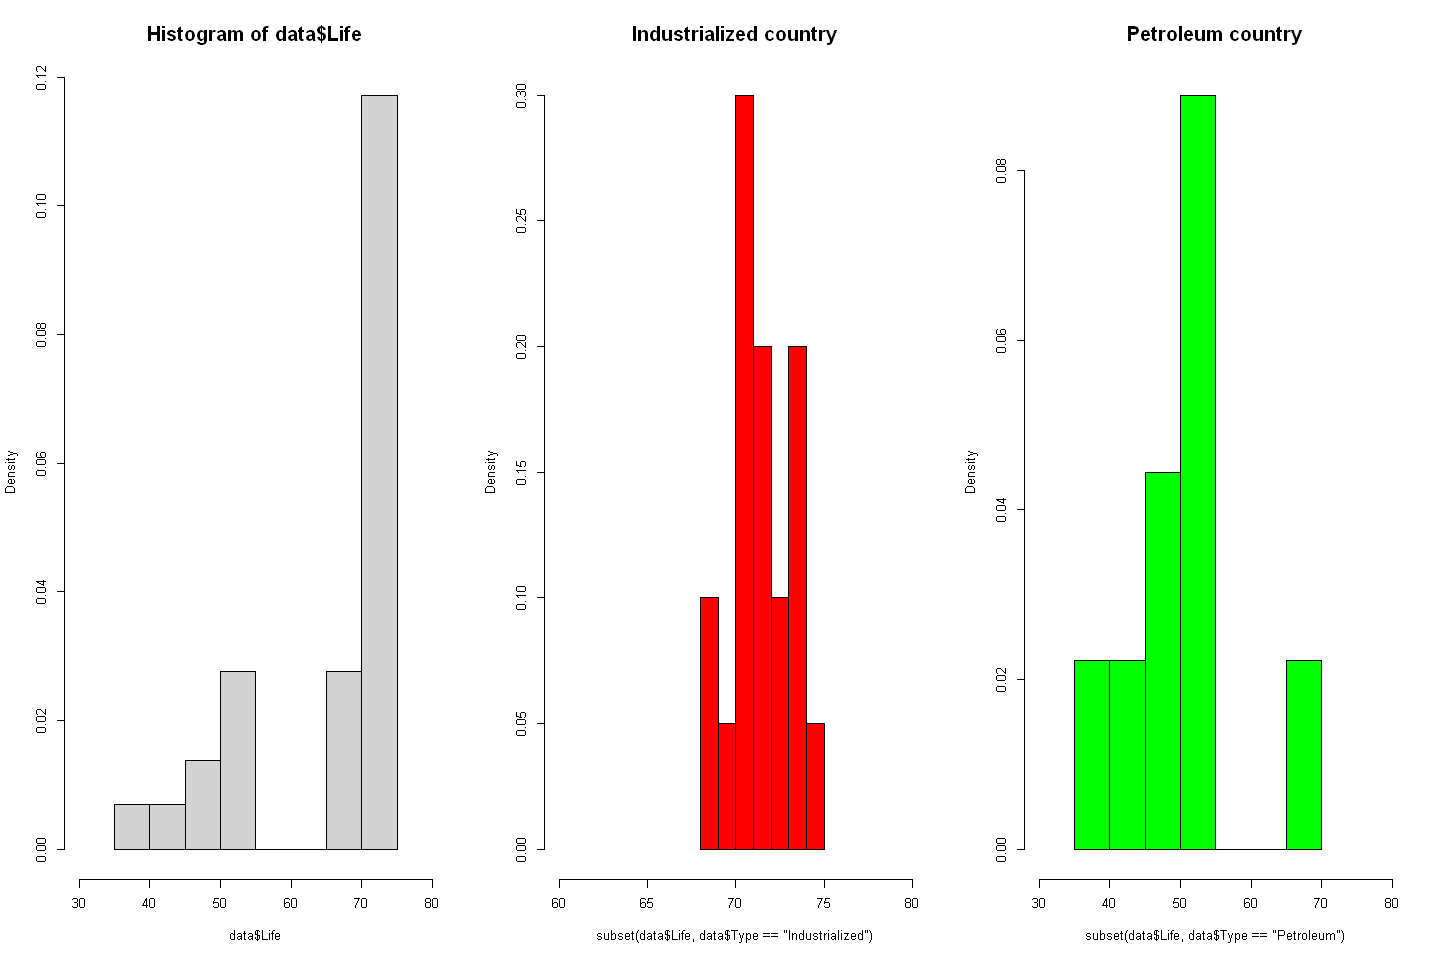

In [19]:
par(mfrow=c(1,3)) 
hist(data$Life,prob=T,xlim=c(30,80),cex.main=1.5)
hist(subset(data$Life,data$Type=='Industrialized'),prob=T,col="red",xlim=c(60,80),main='Industrialized country',cex.main=1.5)
hist(subset(data$Life,data$Type=='Petroleum'),prob=T,col="green",xlim=c(30,80),main='Petroleum country',cex.main=1.5)

#### Model

##### Interpretace regresních koeficientů:
* Intercept: když je země typu Industrialized, očekáváme průměrnou délku života 71.47 let.
* TypePetroleum: když se změní typ země z Industrialized na Petroleum, očekáváme, že průměrná délka života klesne o 21.49 let.

In [20]:
fitCountryType <- lm(Life ~ Type, data=data)
fitCountryType


Call:
lm(formula = Life ~ Type, data = data)

Coefficients:
  (Intercept)  TypePetroleum  
        71.47         -21.49  


##### Testy předpokladů

Aby fungovaly metody analýzy rozptylu, musíme ověřit:

 * Normalitu odchylek.
 * Shodu rozptylů odchylek napříč kategoriemi

Na první pohled histogramu odchýlek bych si troufnul řicí, že nejsou normálně rozdělené. Ověříme to Shapiro-Wilkovým testem. p-hodnota < 0.05, normalitu zamítáme.

Nesplnění předpokladů normálního rozdělení reziduí může zpochybnit výsledky analýzy rozptylu a může vést k nepřesným závěrům

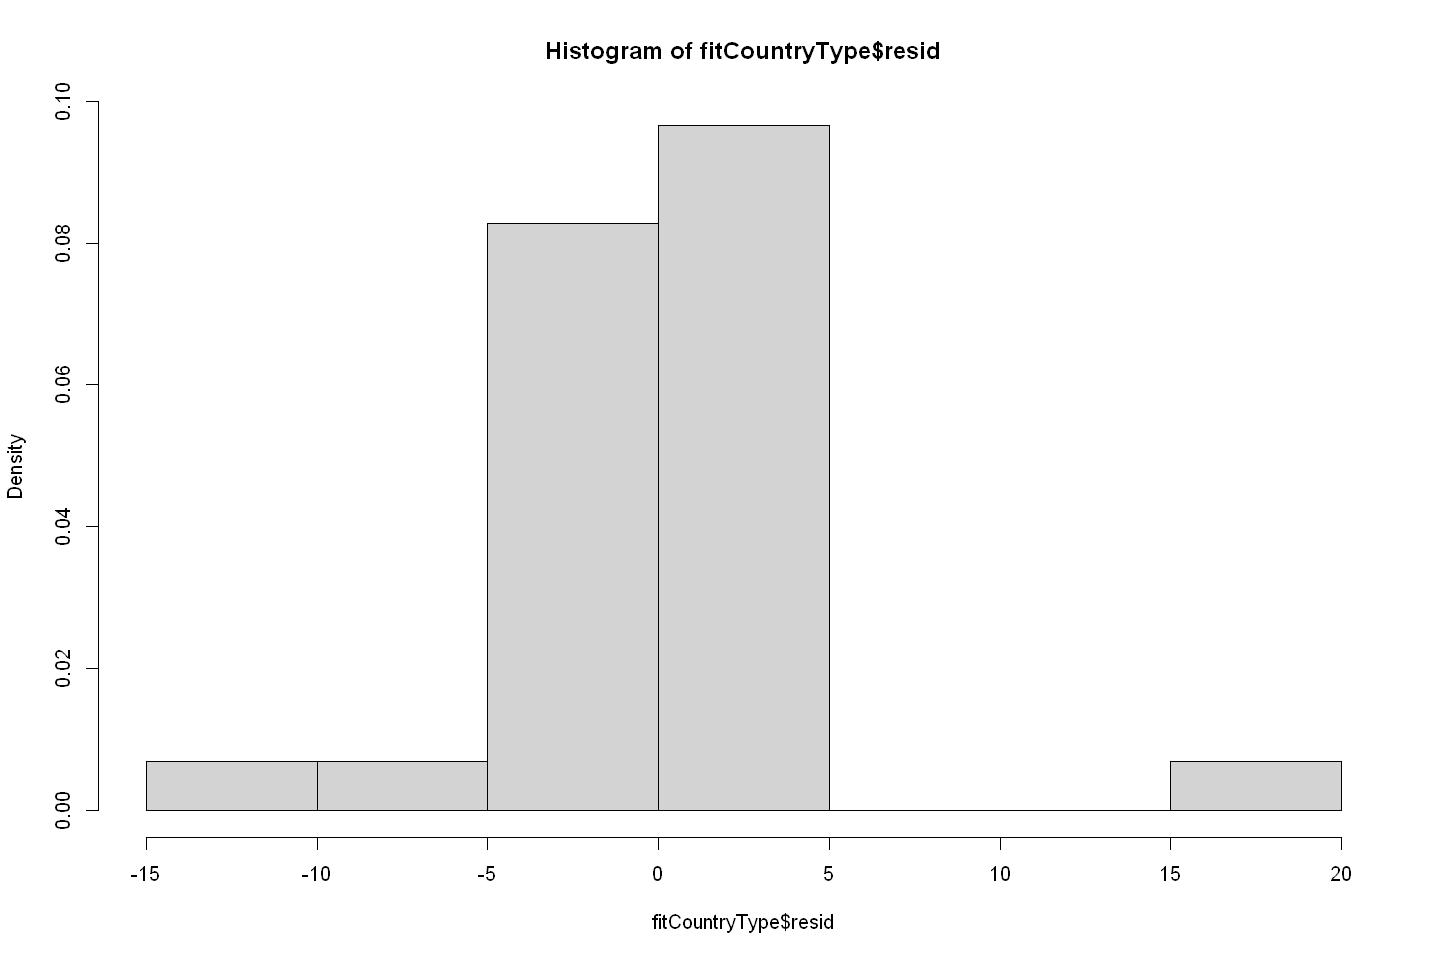

In [21]:
hist(fitCountryType$resid,prob=T)

In [22]:
shapiro.test(fitCountryType$resid)


	Shapiro-Wilk normality test

data:  fitCountryType$resid
W = 0.78123, p-value = 3.918e-05


#### Robustní model 

Pro provedení robustní analýzy rozptylu lmrob() z balíčku robustbase. Tato funkce umožňuje odolnou analýzu lineární regrese, která je méně citlivá na odlehlá pozorování a nesplnění předpokladů o normálním rozdělení reziduí.

Interpretace koeficientů je stejná. Hodnota interceptu a TypePetroleum se mírně liší mezi LM a LMRob, ale rozdíl není velký.

Ověříme předpoklady zase stejným testem, kde opět zamítáme normalitu.

In [23]:
# install.packages("robustbase")
library(robustbase)

fitCountryType_robust <- lmrob(Life ~ Type, data = data)
fitCountryType_robust

Warning message:
"package 'robustbase' was built under R version 4.3.3"



Call:
lmrob(formula = Life ~ Type, data = data)
 \--> method = "MM"
Coefficients:
  (Intercept)  TypePetroleum  
        71.48         -20.79  


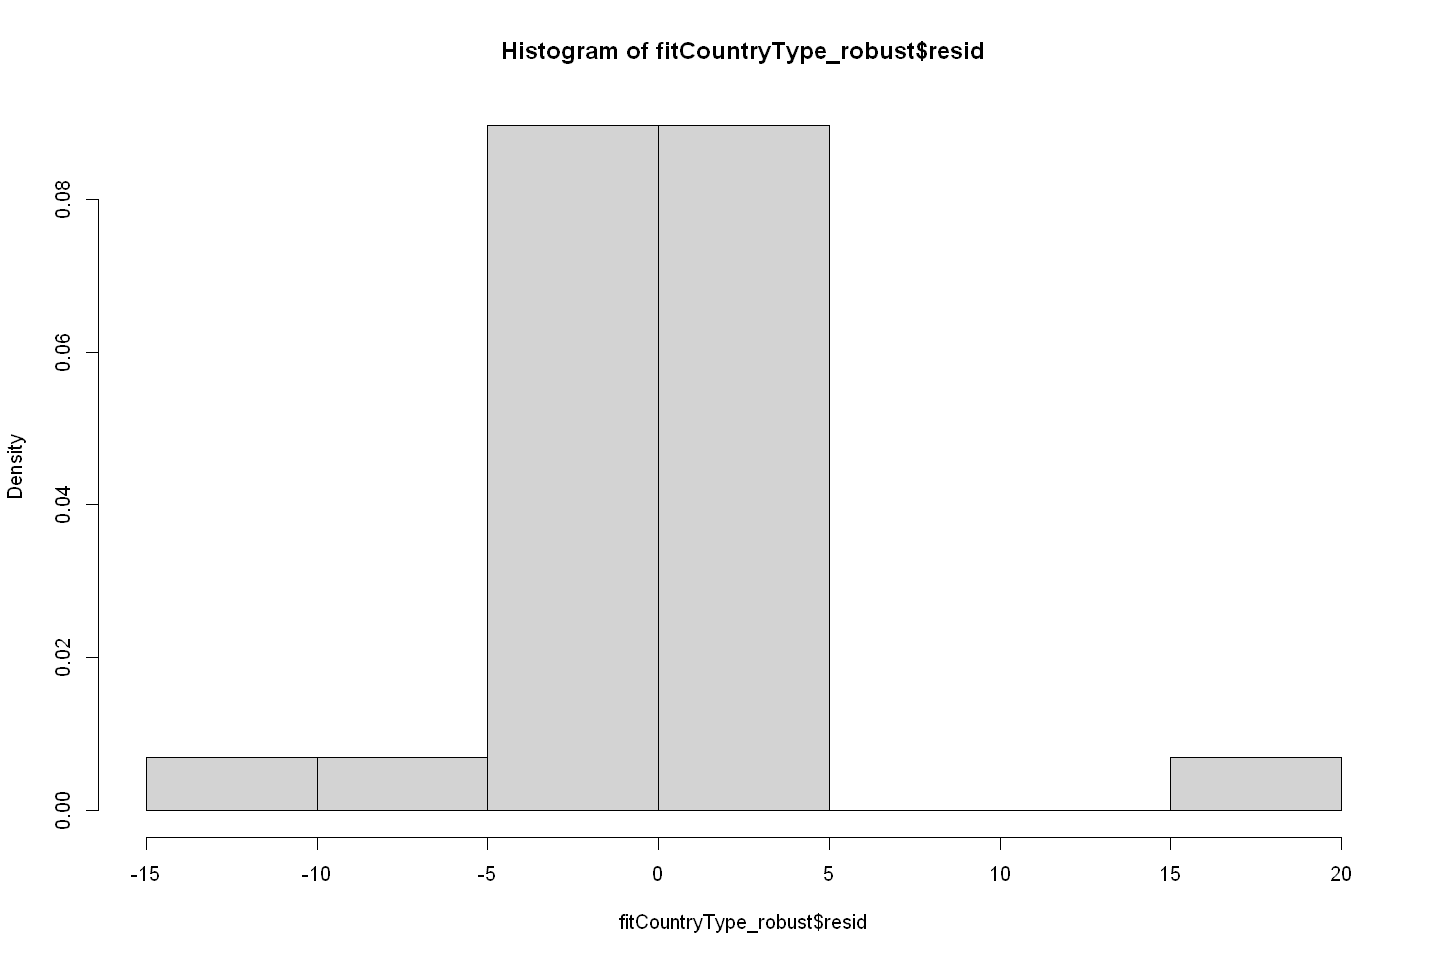

In [24]:
hist(fitCountryType_robust$resid,prob=T)

In [25]:
shapiro.test(fitCountryType_robust$resid)


	Shapiro-Wilk normality test

data:  fitCountryType_robust$resid
W = 0.78061, p-value = 3.824e-05


### Srovnání dvou modelů pomocí Wilcoxonova testu

Tento test poskytuje informace o statistické signifikanci rozdílu mezi rezidui dvou modelů.

Nulová hypotéza je posun mezi polohami reziduí je roven nule.
Alternativní hypotéza je skutečný posun mezi polohami reziduí není roven nule.
 
P-hodnota je 0.6297, to znamená, že není dostatečně silný důkaz na to, abychom tvrdili, že existuje statisticky významný rozdíl mezi rezidui obou modelů.

In [26]:
wilcox.test(fitCountryType$residuals, fitCountryType_robust$residuals)

Warning message in wilcox.test.default(fitCountryType$residuals, fitCountryType_robust$residuals):
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  fitCountryType$residuals and fitCountryType_robust$residuals
W = 452, p-value = 0.6297
alternative hypothesis: true location shift is not equal to 0


In [27]:
summary(fitCountryType)


Call:
lm(formula = Life ~ Type, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.0778  -1.0700   0.0222   1.7300  16.4222 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     71.470      1.035   69.05  < 2e-16 ***
TypePetroleum  -21.492      1.858  -11.57 5.71e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.629 on 27 degrees of freedom
Multiple R-squared:  0.8321,	Adjusted R-squared:  0.8259 
F-statistic: 133.8 on 1 and 27 DF,  p-value: 5.713e-12


=====================================================================================

* Koeficient determinace je 0.8321. To znamená, že 83.21% variability vysvětlované proměnné je vysvětleno modelem. Model dobře vysvětluje variabilitu vysvětlované proměnné
* Koeficient pro intercept (71.47) je statisticky významný (p < 2 * 10^-16), což naznačuje, že průměrná délka života je statisticky odlišná od nuly pro země typu Industrialized, což je takové logické
* Koeficient pro typ země Petroleum (-21.49) je také statisticky významný (p = 5.71 * 10^-12), což naznačuje, že existuje statisticky významný rozdíl ve střední délce života mezi zeměmi typu Industrialized a Petroleum. Danou informaci jsme mohli vidět i na histogramech/boxplotech výše.
* Hodnota F-statistiky je 133.8 s p-hodnotou 5.713e-12. Tento výsledek ukazuje, že model je statisticky významný

In [28]:
summary(fitCountryType_robust)


Call:
lmrob(formula = Life ~ Type, data = data)
 \--> method = "MM"
Residuals:
     Min       1Q   Median       3Q      Max 
-13.7950  -1.0804  -0.1803   1.4050  15.7050 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    71.4804     0.3984  179.42   <2e-16 ***
TypePetroleum -20.7853     1.1188  -18.58   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Robust residual standard error: 2.071 
Multiple R-squared:  0.9581,	Adjusted R-squared:  0.9566 
Convergence in 9 IRWLS iterations

Robustness weights: 
 2 observations c(27,29) are outliers with |weight| = 0 ( < 0.0034); 
 2 weights are ~= 1. The remaining 25 ones are summarized as
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06331 0.88900 0.97060 0.90080 0.98710 0.99690 
Algorithmic parameters: 
       tuning.chi                bb        tuning.psi        refine.tol           rel.tol         scale.tol         solve.tol          zero.tol 
        1.548e+00         5.

=====================================================================================

##### Srovnání s předchozím modelem
* Robustní model má vyšší R-squared, což naznačuje, že robustní model lépe vysvětluje variabilitu vysvětlované proměnné.
* V obou modelech jsou koeficienty statisticky významné a mají podobnou úroveň významnosti.
* Robustní model má nižší standardní chybu reziduí, což naznačuje, že je robustnější vůči odlehlým pozorováním, což jsme očekávali od daného modelu
* vysoké Adjusted R-squared a F-statistiky, což naznačuje, že jsou oba modely statisticky významné.

## Model obsahující oba regresory z předchozích bodů včetně jejich interakce

Uvažujme následující model:
 $$y = \hat\beta_0 + \hat\beta_1\cdot TypePetroleum + \hat\beta_2 \cdot Income + \hat\beta_3 \cdot TypePetroleum\cdot Income$$ 

##### Interpretace regresních koeficientů:
* Intercept: 68.83 let. To znamená, že odhadnutá průměrná délka života pro zemi typu Industrialized při nulové hodnotě příjmů je přibližně 68.83 let
* TypePetroleum: rozdíl v průměrné délce života mezi zeměmi typu Petroleum a Industrialized při nulové hodnotě příjmů. To znamená, že průměrná délka života pro zemi typu Petroleum je o 20.4 let nižší než pro zemi typu Industrialized při nulové hodnotě příjmů.
* Income: změna v průměrné délce života pro každý jednotkový nárůst příjmu. To znamená, že každý $ příjmu je spojen s nárůstem průměrné délky života o 0.0008856 roku
* TypePetroleum:Income: změna příjmu promítá do změny ve vztahu mezi průměrnou délkou života a typem země. V našem případě vliv příjmu na průměrnou délku života se liší mezi zeměmi typu "Petroleum" a "Industrialized".

In [29]:
fitInteraction <- lm(Life ~ Type * Income, data = data)
fitInteraction


Call:
lm(formula = Life ~ Type * Income, data = data)

Coefficients:
         (Intercept)         TypePetroleum                Income  TypePetroleum:Income  
           6.835e+01            -2.042e+01             8.856e-04             1.229e-03  


In [30]:
summary(fitInteraction)


Call:
lm(formula = Life ~ Type * Income, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4145  -1.1003  -0.3879   1.4296  15.8443 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           6.835e+01  3.091e+00  22.116  < 2e-16 ***
TypePetroleum        -2.042e+01  3.840e+00  -5.318 1.64e-05 ***
Income                8.856e-04  8.288e-04   1.069    0.295    
TypePetroleum:Income  1.229e-03  1.937e-03   0.634    0.532    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.578 on 25 degrees of freedom
Multiple R-squared:  0.8479,	Adjusted R-squared:  0.8297 
F-statistic: 46.47 on 3 and 25 DF,  p-value: 2.27e-10


=====================================================================================

* Intercept je statisticky významný. Průměrná délka života při nulové hodnotě příjmů je statisticky odlišná od nuly.
* Koeficient pro typ země Petroleum je také statisticky významný.
* Koeficient Income není statisticky významný (p = 0.295). To naznačuje, že v tomto modelu není dostatečná evidence pro to, že příjem má vliv na průměrnou délku života.
* Koeficient interakce TypePetroleum:Income také není statisticky významný (p = 0.532)
* R-squared je 0.8479, což naznačuje, že 84.79% variability vysvětlované proměnné je vysvětleno modelovými proměnnými. Robustní model s kategorickým příznakem měl R-squared mnohem vyšší
* F-statistika má hodnotu 46.47 s p-hodnotou 2.27e-10, což naznačuje, že celkový model je statisticky významný, alespoň jeden z regresorů je významný ( Intercept a TypePetroleum)

### Zobrazení regresní závislosti
Ideálně bychom chtěli vidět, že body v scatterplotu jsou rovnoměrně rozptýleny kolem horizontální čáry nulových reziduí a histogram by měl být přibližně normální, což v našem případě se bohužel nestalo.

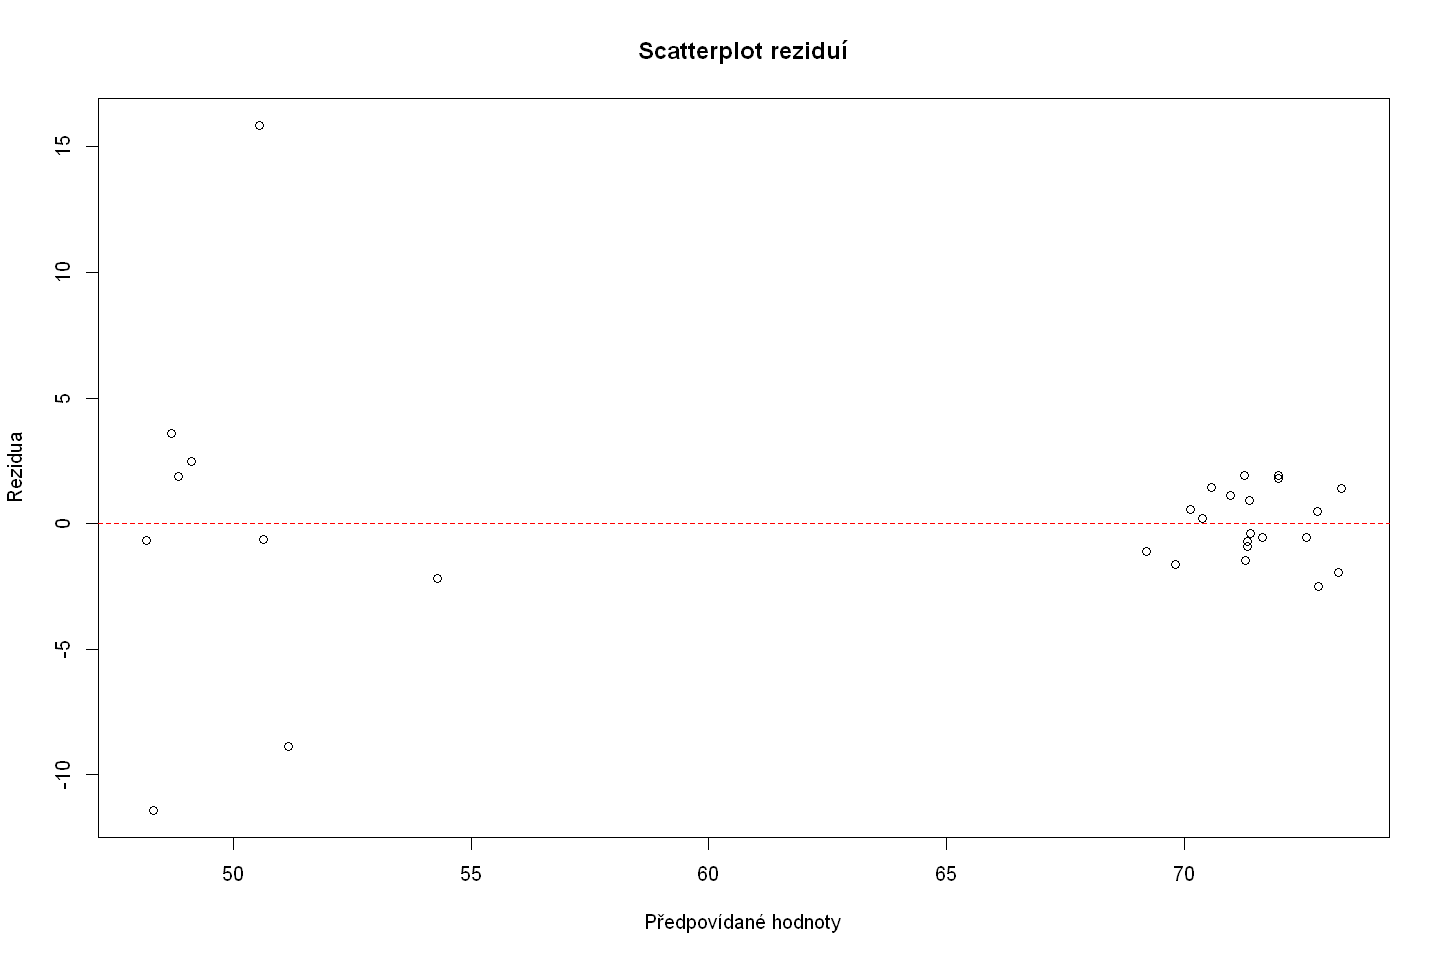

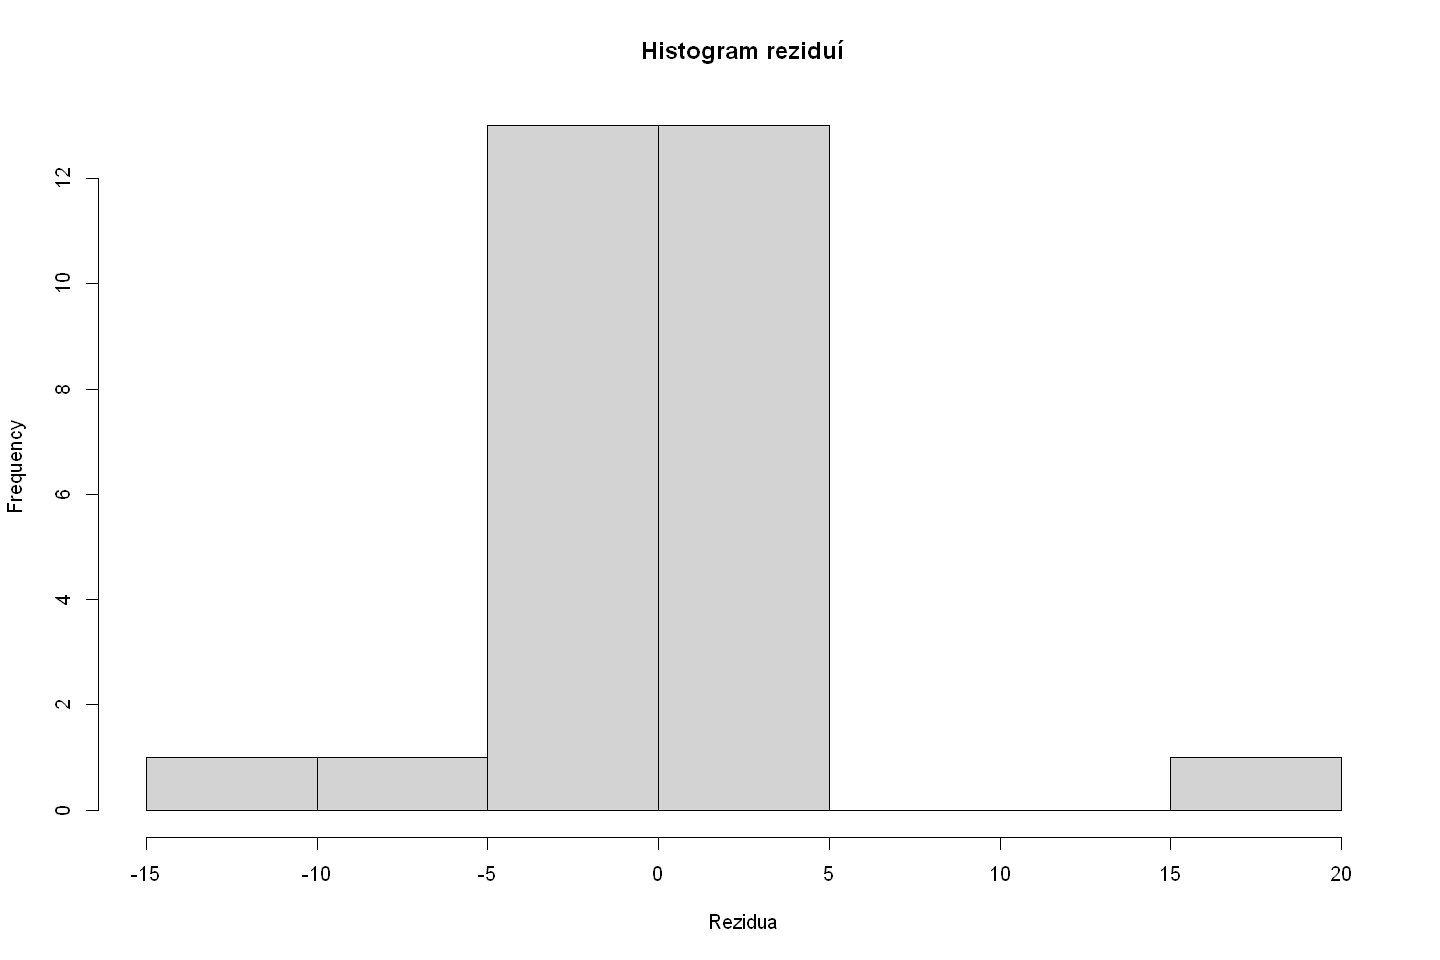

In [31]:
plot(fitInteraction$fitted.values, fitInteraction$residuals, 
     xlab = "Předpovídané hodnoty", ylab = "Rezidua",
     main = "Scatterplot reziduí")
abline(h = 0, col = "red", lty = 2)

hist(fitInteraction$residuals, 
     main = "Histogram reziduí",
     xlab = "Rezidua")

Podle mého názoru predikce tohoto modelu se mi nezdá tak špatná. Výjimkou tvoří outliery, kde chyba je mnohem horší. 

In [32]:
tmp <- predict(fitInteraction, interval="prediction")
predict <- cbind(data, tmp)
predict

Warning message in predict.lm(fitInteraction, interval = "prediction"):
"predictions on current data refer to _future_ responses
"


,Country,Life,Income,Type,fit,lwr,upr
,<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,Australia,71.0,3426,Industrialized,71.38786,61.72519,81.05053
2,Austria,70.4,3350,Industrialized,71.32055,61.65489,80.98621
3,Belgium,70.6,3346,Industrialized,71.31701,61.65114,80.98288
4,Canada,72.0,4751,Industrialized,72.56132,62.67366,82.44899
5,Denmark,73.3,5029,Industrialized,72.80753,62.80817,82.80688
6,Finland,69.8,3312,Industrialized,71.28690,61.61908,80.95471
7,France,72.3,3403,Industrialized,71.36749,61.70410,81.03088
8,West_Germany,70.3,5040,Industrialized,72.81727,62.81306,82.82148
9,Ireland,70.7,2009,Industrialized,70.13292,60.13378,80.13205


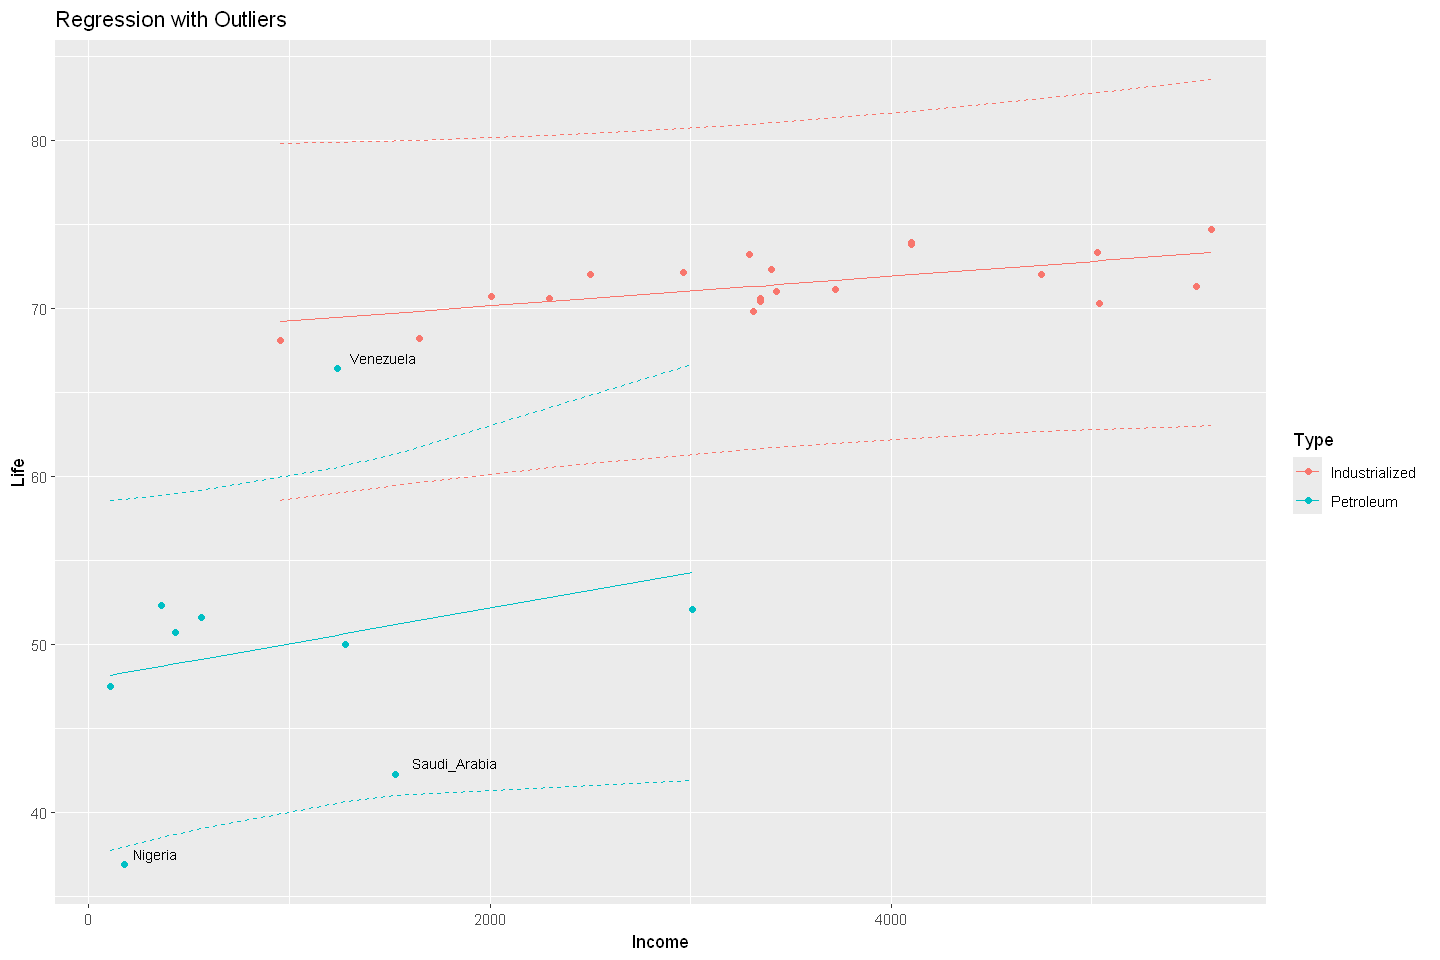

In [33]:
# Calculate distances from each point to the regression line
predict <- predict %>%
  mutate(residual = Life - fit)

# Sort points by decreasing distance
predict <- predict %>%
  arrange(desc(abs(residual)))

# Select top 3 outliers with largest distances
top_3_outliers <- head(predict, 3)

# Create the plot with points and model lines
ggplot(predict, aes(x = Income, y = Life, color = Type)) +
  geom_point() +
  geom_line(aes(y = fit)) +
  geom_line(aes(y = lwr), linetype = "dashed") +
  geom_line(aes(y = upr), linetype = "dashed") +
  geom_text(data = top_3_outliers, aes(label = Country), hjust = -0.2, vjust = -0.5, size = 3, color = "black") +
  labs(title = "Regression with Outliers", x = "Income", y = "Life")

## Model s předchozími dvěma regresory a jedním dalším ze zkoumaného datového souboru.

Po zkoumání dvou regresorů kolegy vidím, že zbývá mi jen sloupec Country. Ale nemůžu ho přímo použít, protože je unikátní pro každý řádek datasetu. Proto musím udělat nějaké manipulace s ním pro vytvoření vhodné proměnné. Já jsem rozhodl udělat nový sloupec In_Europe, kde 1 - země se nachází v Evropě, 0 - země se nenachází v Evropě.

In [34]:
europe_vector <- data$Country %in% c("Austria", "Belgium", "Denmark", "Finland", "France", 
                                     "West_Germany", "Ireland", "Italy", "Netherlands", "Norway", 
                                     "Portugal", "Sweden", "Switzerland", "Britain")
data <- mutate(data, In_Europe = ifelse(europe_vector, 1, 0))

In [35]:
data

,Country,Life,Income,Type,In_Europe
,<chr>,<dbl>,<dbl>,<fct>,<dbl>
1,Australia,71.0,3426,Industrialized,0
2,Austria,70.4,3350,Industrialized,1
3,Belgium,70.6,3346,Industrialized,1
4,Canada,72.0,4751,Industrialized,0
5,Denmark,73.3,5029,Industrialized,1
6,Finland,69.8,3312,Industrialized,1
7,France,72.3,3403,Industrialized,1
8,West_Germany,70.3,5040,Industrialized,1
9,Ireland,70.7,2009,Industrialized,1


Ted začnu zkoumat, jaké regrsory jsou signifikántní pro regresní model.

Nejprve, udělám model, který bude obsahovat všechny regrsory bez interakcí:


$$\text{Life}_i=\beta_0+\text{Income}_i\cdot\beta_\text{Income}+ \text{Type}_i\cdot\beta_\text{Type}+\text{InEurope}_i\cdot\beta_\text{InEurope}+\epsilon_i$$

In [36]:
fit_all <- lm(Life ~ Income + Type + In_Europe, data = data)
summary(fit_all)


Call:
lm(formula = Life ~ Income + Type + In_Europe, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.1824  -0.9195  -0.0282   1.3330  16.1111 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.689e+01  3.390e+00  19.734  < 2e-16 ***
Income         1.138e-03  7.569e-04   1.504    0.145    
TypePetroleum -1.801e+01  3.202e+00  -5.626 7.45e-06 ***
In_Europe      8.204e-01  2.257e+00   0.363    0.719    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.603 on 25 degrees of freedom
Multiple R-squared:  0.8463,	Adjusted R-squared:  0.8279 
F-statistic: 45.88 on 3 and 25 DF,  p-value: 2.593e-10


Vidím, že kromě absolutního členu a regresoru TypePetroleum jsou všechny ostatní regresory nevýznamné.

Nevýznamnost musím interpretovat z hlediska každého z regresorů zvlášť - když ho z původního modelu vynechám, nic významného se nestane.
Nevím, co se stane, kdybych vynechal všechny nevýznamné regresory dohromady. Proto musím porovnat původní model obsahující všechny regresory s modely obshaujícími nějaké interakce mezi regresory a s podmodely s vynechanými regresory.

Především, ověrme zda tady jednotlivé regresory modelu jsou závislé na všech ostatních. Udělám to pomocí faktoru zvětšení rozptylu VIF:

In [37]:
library(car)
round(vif(fit_all),3)

Income      Type In_Europe 
    2.103     3.004     1.742

Vidím, že všechny regresory má VIF menší než 5, proto můžeme je nechat.

Zkusím v širším modelu fit_all přidat i interakce mezi všechny regresory a otestovat, jestli přináší významné zlepšení predikce.

In [38]:
fit_int=lm(Life ~ Income * Type * In_Europe, data=data)
summary(fit_int)

summary(fit_all)$r.squared
summary(fit_all)$adj.r.squared

summary(fit_int)$r.squared
summary(fit_int)$adj.r.squared


Call:
lm(formula = Life ~ Income * Type * In_Europe, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.415  -1.133   0.091   1.309  15.844 

Coefficients: (2 not defined because of singularities)
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     6.843e+01  6.267e+00  10.920 1.42e-10 ***
Income                          7.240e-04  1.598e-03   0.453  0.65482    
TypePetroleum                  -2.050e+01  6.700e+00  -3.060  0.00555 ** 
In_Europe                      -2.388e-01  7.309e+00  -0.033  0.97422    
Income:TypePetroleum            1.390e-03  2.422e-03   0.574  0.57156    
Income:In_Europe                2.729e-04  1.903e-03   0.143  0.88722    
TypePetroleum:In_Europe                NA         NA      NA       NA    
Income:TypePetroleum:In_Europe         NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.76 on 23 degrees of fr

[1] 0.8462974

[1] 0.8278531

[1] 0.8487538

[1] 0.8158742

Vidím, že jen intercept a TypePetroleum jsou významné regresory. Je vidět, že u některých kombinací interakcí už v datech není dostatek pozorování, aby bylo možné odhadnout parametry, proto zkusím otestovat modely s interakcemi mezi jednotlivými regresory. 
Obyčejný koeficent determinace Multiple R-Squared je skoro stejný, ale adjustovaný Adjusted R-Squared je o něco horší u modelu s interakcemi.

In [39]:
anova(fit_int, fit_all)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,23,521.1219,NA,NA,NA,NA
2,25,529.5853,-2,-8.463368,0.1867677,0.8308822


p-hodnota hypotézy H0 je rovna 0.8308822, tedy nezamítáme nulovou hypotézu. Z analýzy rozpytlů vidím, že není žádný rozdíl mezi modely fit_all a fit_int.

Uvažuju podmodel zahrnující jen regresory Income a Type:

$$\text{Life}_i=\beta_0+\text{InEurope}_i\cdot\beta_\text{InEurope}+ \text{Type}_i\cdot\beta_\text{Type}+\epsilon_i$$

In [40]:
fit_type_europe <- lm(Life ~ In_Europe + Type, data = data)
summary(fit_type_europe)

summary(fit_all)$r.squared
summary(fit_all)$adj.r.squared

summary(fit_type_europe)$r.squared
summary(fit_type_europe)$adj.r.squared


Call:
lm(formula = Life ~ In_Europe + Type, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.0778  -1.2143   0.1667   1.6857  16.4222 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     71.133      1.924  36.971  < 2e-16 ***
In_Europe        0.481      2.300   0.209    0.836    
TypePetroleum  -21.156      2.484  -8.517 5.36e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.713 on 26 degrees of freedom
Multiple R-squared:  0.8324,	Adjusted R-squared:  0.8195 
F-statistic: 64.56 on 2 and 26 DF,  p-value: 8.236e-11


[1] 0.8462974

[1] 0.8278531

[1] 0.8323951

[1] 0.8195024

Vidím, že signifikántí regresory jsou jen Intercept a TypePetroleum. Multiple R-Sqaured a Adjusted R-Squared jsou horší než u půvdoního modelu

In [41]:
anova(fit_type_europe, fit_all)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,26,577.4861,NA,NA,NA,NA
2,25,529.5853,1,47.90076,2.261239,0.1451769


p-hodnota je 0.1451769, tedy nulovost nezamítáme. Z testu vidím, že není statisticky významný rozdíl mezi šírším modelem a podmodelem.

Ted zkusím podmodel s regrosory Income a Type:

$$\text{Life}_i=\beta_0+\text{Income}_i\cdot\beta_\text{Income}+ \text{Type}_i\cdot\beta_\text{Type}+\epsilon_i$$

In [42]:
fit_type_income <- lm(Life ~ Income + Type, data = data)
summary(fit_type_income)

summary(fit_all)$r.squared
summary(fit_all)$adj.r.squared

summary(fit_type_income)$r.squared
summary(fit_type_income)$adj.r.squared


Call:
lm(formula = Life ~ Income + Type, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2041  -0.8826  -0.1471   1.3183  16.1187 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.756e+01  2.795e+00  24.174  < 2e-16 ***
Income         1.111e-03  7.404e-04   1.500    0.146    
TypePetroleum -1.866e+01  2.621e+00  -7.119 1.47e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.525 on 26 degrees of freedom
Multiple R-squared:  0.8455,	Adjusted R-squared:  0.8336 
F-statistic: 71.13 on 2 and 26 DF,  p-value: 2.862e-11


[1] 0.8462974

[1] 0.8278531

[1] 0.8454853

[1] 0.8335995

Zase vidím, že intercept a Type jsou významné komponenty. Multiple R-Squared koeficient je trochu horší než u původního modelu, ale je Adjusted R-Squared o něco vyšší.

In [43]:
anova(fit_type_income, fit_all)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,26,532.3836,NA,NA,NA,NA
2,25,529.5853,1,2.798294,0.1320984,0.7193216


Podle p-hodnoty F-testu opět není mezi modely statisticky výzmanmý rozdíl.

Zkusím ted, podmodel obsahující regresory InEurope a Income: 

$$\text{Life}_i=\beta_0+\text{InEurope}_i\cdot\beta_\text{InEurope}+ \text{Income}_i\cdot\beta_\text{Income}+\epsilon_i$$

In [44]:
fit_income_europe <- lm(Life ~ In_Europe + Income, data = data)
summary(fit_income_europe)

summary(fit_all)$r.squared
summary(fit_all)$adj.r.squared

summary(fit_income_europe)$r.squared
summary(fit_income_europe)$adj.r.squared


Call:
lm(formula = Life ~ In_Europe + Income, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.1323  -3.2581  -0.4535   4.0143  11.4092 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.033e+01  2.480e+00  20.293  < 2e-16 ***
In_Europe   7.853e+00  2.774e+00   2.831  0.00884 ** 
Income      3.917e-03  8.465e-04   4.628 8.98e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.794 on 26 degrees of freedom
Multiple R-squared:  0.6517,	Adjusted R-squared:  0.6249 
F-statistic: 24.32 on 2 and 26 DF,  p-value: 1.111e-06


[1] 0.8462974

[1] 0.8278531

[1] 0.6516801

[1] 0.6248863

Jak to bylo očekávané, obyčejný a adjustovaný koeficeinty determinace jsou mnohem horší než u původního šíršího modelu, protože zvolený podmodel neobsahuje signifikantní regresor - TypePetroleum.

In [45]:
anova(fit_income_europe, fit_all)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,26,1200.1431,NA,NA,NA,NA
2,25,529.5853,1,670.5578,31.65485,7.445109e-06


Jak ukazuje test na analýzu rozptylů, p-hodnota je rovna 7.445109e-06. Tedy, je mezi modely významný statisticky rozdíl.

Odebráním proměnné TypePetroleum se model významně zhoršil.

Ted zkusím podmodel obsahující pouze jeden signifikántní regresor - TypePetroleum:

$$\text{Life}_i=\beta_0+\text{Type}_i\cdot\beta_\text{Type}+\epsilon_i$$

In [46]:
fit_type <- lm(Life ~ Type, data = data)
summary(fit_type)

summary(fit_all)$r.squared
summary(fit_all)$adj.r.squared

summary(fit_type)$r.squared
summary(fit_type)$adj.r.squared


Call:
lm(formula = Life ~ Type, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.0778  -1.0700   0.0222   1.7300  16.4222 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     71.470      1.035   69.05  < 2e-16 ***
TypePetroleum  -21.492      1.858  -11.57 5.71e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.629 on 27 degrees of freedom
Multiple R-squared:  0.8321,	Adjusted R-squared:  0.8259 
F-statistic: 133.8 on 1 and 27 DF,  p-value: 5.713e-12


[1] 0.8462974

[1] 0.8278531

[1] 0.8321131

[1] 0.8258951

Podmodel založený pouze na jedné významné proměnné má trochu horší Multiple R-Squared a Adjusted R-Squared.

In [47]:
anova(fit_type, fit_all)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,27,578.4576,NA,NA,NA,NA
2,25,529.5853,2,48.87229,1.153551,0.3317455


Podle p-hodnoty testu nezamítáme nenulovost hypotézy. Tedy, není mezi modely statisticky významný rozdíl.

Porovnám Akaikeho a Bayesovské informační kritéria předchozích modelů.

In [48]:
AIC(fit_all)
AIC(fit_int)
AIC(fit_type_europe)
AIC(fit_type_income)
AIC(fit_income_europe)
AIC(fit_type)

[1] 176.5376

[1] 180.0704

[1] 177.0487

[1] 174.6904

[1] 198.2625

[1] 175.0974

In [49]:
BIC(fit_all)
BIC(fit_int)
BIC(fit_type_europe)
BIC(fit_type_income)
BIC(fit_income_europe)
BIC(fit_type)

[1] 183.3741

[1] 189.6415

[1] 182.5179

[1] 180.1596

[1] 203.7317

[1] 179.1993

Podle Akaikeho informačního kritéria je nejšikovnější model obsahující regresory Type a Income. Ale podle Bayesovskeho kritéria je takovým modelem model jen s jedním signifikántím regresorem - Type. 

BIC penalizuje silněji složitější modely, preferuje jednoduchost modelů. AIC preferuje výslednou přesnost modelů navzdory složitosti modelů. 
Regresor Income není signifikántím regresorem a AIC hodnota modelu s významným regresorem je trochu horší než AIC hodnota modelu s regresorem Income, proto můžu vybrat model fit_type.

Ted zkusím seknvencně přidávat jednotlivě komponety do modelu. Začnu u modelu očekávané délky života pouze s absolutním členem a uvidím co z toho vyjde.

In [50]:
add1(lm(Life~1, data=data),~Type+Income+In_Europe,test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,3445.5201,140.54849,NA,NA
Type,1,2867.062,578.4576,90.79901,133.82258,5.713448e-12
Income,1,1875.471,1570.0491,119.75542,32.25232,4.947756e-06
In_Europe,1,1256.827,2188.6931,129.38916,15.50438,5.219398e-04


Vidím, že týp země má významný vliv na očekávanou délku života.

Podívám se na to, co se stane, pokud budu odstraňovat jednotlivé regresory ze složitějšího a šíršího modelu.

In [51]:
drop1(lm(Life~Type+Income+In_Europe, data=data),test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,529.5853,92.23915,NA,NA
Type,1,670.557754,1200.1431,113.96411,31.6548511,7.445109e-06
Income,1,47.900760,577.4861,92.75027,2.2612391,1.451769e-01
In_Europe,1,2.798294,532.3836,90.39198,0.1320984,7.193216e-01


Opět vidím, že týp země má velký vliv na délku života. Odebráním proměnné Type jsem signifikántně zhoršil model, ale odebráním proměnných Income a InEurope se model skoro nezměnil.

Nejlepší regresní model je model založený na jedné proměnné Type, který je jediným významným komponentem mezi ostatními. Ale pro určení nejlepšího finálního modelu prozkoumáme ostatní druhy regrese.

Nejprve zkusíme nafitovat model robustní regrese, protože mám odlehlá pozorování v našem datasetu. Robustní regrese je méně citlivá na outliery. Podívám se, zda robustní regrese nějak zlepší či zhorší model.

In [52]:
fit_robust <- lmrob(Life ~ Type + Income + In_Europe, data = data)
summary(fit_robust)

summary(fit_all)$r.squared
summary(fit_all)$adj.r.squared

summary(fit_robust)$r.squared
summary(fit_robust)$adj.r.squared


Call:
lmrob(formula = Life ~ Type + Income + In_Europe, data = data)
 \--> method = "MM"
Residuals:
      Min        1Q    Median        3Q       Max 
-13.11864  -1.17719   0.01893   1.10625  15.42965 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.774e+01  1.039e+00  65.211  < 2e-16 ***
TypePetroleum -1.788e+01  9.324e-01 -19.177  < 2e-16 ***
Income         8.978e-04  2.310e-04   3.887 0.000662 ***
In_Europe      8.310e-01  6.689e-01   1.242 0.225633    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Robust residual standard error: 1.892 
Multiple R-squared:  0.9741,	Adjusted R-squared:  0.971 
Convergence in 8 IRWLS iterations

Robustness weights: 
 3 observations c(27,28,29) are outliers with |weight| = 0 ( < 0.0034); 
 4 weights are ~= 1. The remaining 22 ones are summarized as
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8111  0.9341  0.9649  0.9473  0.9796  0.9988 
Algorithmic parameters: 
       tuning.chi   

[1] 0.8462974

[1] 0.8278531

[1] 0.9740922

[1] 0.9709832

Vidím, že jsem dostal pomocí robustní regrese model, který má koeficienty determinace mnohem lepší než model lineární regrese, skoro dokonalé. Podle robustní regrese mám dva významné komponenty - Type a Income. Zkusím tedy robustní regrese na dvou významných regresorech.

In [53]:
fit_type_income_robust <- lmrob(Life ~ Type + Income, data = data)
summary(fit_type_income_robust)

summary(fit_robust)$r.squared
summary(fit_robust)$adj.r.squared

summary(fit_type_income_robust)$r.squared
summary(fit_type_income_robust)$adj.r.squared

Warning message in lmrob.S(x, y, control = control):
"S refinements did not converge (to refine.tol=1e-07) in 200 (= k.max) steps"
Warning message in lmrob.fit(x, y, control, init = init):
"initial estim. 'init' not converged -- will be return()ed basically unchanged"



Call:
lmrob(formula = Life ~ Type + Income, data = data)
 \--> method = "S"
Residuals:
     Min       1Q   Median       3Q      Max 
-13.2724  -1.2309  -0.5243   1.0619  15.2076 

Algorithm did not converge

Coefficients of the *initial* S-estimator:
                Estimate Std. Error t value Pr(>|t|)
(Intercept)    68.228228         NA      NA       NA
TypePetroleum -18.228194         NA      NA       NA
Income          0.000962         NA      NA       NA

Robustness weights: 
 3 observations c(27,28,29) are outliers with |weight| = 0 ( < 0.0034); 
 The remaining 26 ones are summarized as
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06189 0.55320 0.79440 0.69660 0.88030 0.99490 
Algorithmic parameters: 
       tuning.chi                bb        tuning.psi        refine.tol           rel.tol         scale.tol         solve.tol          zero.tol 
        1.548e+00         5.000e-01         4.685e+00         1.000e-07         1.000e-07         1.000e-10         1.000e-07       

[1] 0.9740922

[1] 0.9709832

[1] 0.9800831

[1] 0.978551

Koeficienty determinace se trochu zhoršili, ale dle zadání musím zvolit model jen s signifikántními regresory. Přestože koeficienty se zmenšili, oni jsou velmi dobré.

Ted zkusím model logaritmické regrese.

In [54]:
fit_type_log=lm(log(Life) ~ Type + Income + In_Europe,data=data)
summary(fit_type_log)

summary(fit_type)$r.squared
summary(fit_type)$adj.r.squared

summary(fit_type_log)$r.squared
summary(fit_type_log)$adj.r.squared


Call:
lm(formula = log(Life) ~ Type + Income + In_Europe, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.277203 -0.012395  0.003987  0.017786  0.290471 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.195e+00  6.679e-02  62.805  < 2e-16 ***
TypePetroleum -3.126e-01  6.308e-02  -4.955 4.18e-05 ***
Income         1.869e-05  1.491e-05   1.253    0.222    
In_Europe      1.223e-02  4.447e-02   0.275    0.786    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09069 on 25 degrees of freedom
Multiple R-squared:  0.8066,	Adjusted R-squared:  0.7834 
F-statistic: 34.76 on 3 and 25 DF,  p-value: 4.474e-09


[1] 0.8321131

[1] 0.8258951

[1] 0.8066269

[1] 0.7834221

Logaritmická regrese ale zhoršila model, koeficienty determinace se zmenšili.

Na základě všech výše uvedených porovnání, konečně můžu udělat závěr, že ze všech prozkoumaných modelů finálním modelem můžu zvolit model robustní regrese na záklaldě dvou významných regresorů - Type a Income.

In [55]:
final_model <- lmrob(Life ~ Type + Income, data = data)
summary(final_model)


Call:
lmrob(formula = Life ~ Type + Income, data = data)
 \--> method = "MM"
Residuals:
     Min       1Q   Median       3Q      Max 
-13.1049  -1.1810  -0.3274   1.2698  15.4877 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.846e+01  8.475e-01  80.783  < 2e-16 ***
TypePetroleum -1.861e+01  8.633e-01 -21.560  < 2e-16 ***
Income         8.560e-04  2.496e-04   3.429  0.00203 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Robust residual standard error: 2.071 
Multiple R-squared:  0.9711,	Adjusted R-squared:  0.9689 
Convergence in 7 IRWLS iterations

Robustness weights: 
 2 observations c(27,29) are outliers with |weight| = 0 ( < 0.0034); 
 one weight is ~= 1. The remaining 26 ones are summarized as
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02746 0.92670 0.96830 0.92320 0.99240 0.99770 
Algorithmic parameters: 
       tuning.chi                bb        tuning.psi        refine.tol           rel.tol         sca

=====================================================================================

1. Odhady regresních koeficientů:
    * Intercept: Odhadovaná hodnota délky života, když příjem na obyvatele a chybí týp země jsou 0, je přibližně 68 let. Podle p-hodnoty je statisticky významný.
    * TypePetroleum: Koeficinet pro TypePetroleum je roven -18, což znamená, pokud je země vývozce ropy, tak sníží délka života o 18 let, jinak délka života se nezmění. Podle p-hodnoty je statisticky významný.
    * Income: Koeficinet pro Income je roven přibližně 8.56x10^-4. Tedy na každý dolar příjmu připadá plus 8.56x10^-4 let. Podle p-hodnoty je statisticky významný.

2. Kvalita modelu:
    * Robustní rozptyl reziduí: Standardní chyba reziduí je přibližně 2.071.
    * Multiple R-squared a Adjusted R-squared: Obyčejný koeficient determinace je roven 0.9711. Model vysvětluje přibližně 97.11% variance v délce života. Adjustovaný koeficent determinace, který bere v úvahu počet prediktorů, je přibližně 96.89%.
      
=====================================================================================

Uděláme predikce pomocí finálního modelu.

In [56]:
tmp <- predict(final_model, interval="prediction")
predict <- cbind(data, tmp)
predict

Warning message in predict.lmrob(final_model, interval = "prediction"):
"Predictions on current data refer to _future_ responses"


,Country,Life,Income,Type,In_Europe,fit,lwr,upr
,<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,Australia,71.0,3426,Industrialized,0,71.39537,67.09158,75.69915
2,Austria,70.4,3350,Industrialized,1,71.33031,67.02755,75.63307
3,Belgium,70.6,3346,Industrialized,1,71.32689,67.02417,75.62960
4,Canada,72.0,4751,Industrialized,0,72.52957,68.15188,76.90726
5,Denmark,73.3,5029,Industrialized,1,72.76754,68.36116,77.17392
6,Finland,69.8,3312,Industrialized,1,71.29778,66.99540,75.60017
7,France,72.3,3403,Industrialized,1,71.37568,67.07224,75.67911
8,West_Germany,70.3,5040,Industrialized,1,72.77695,68.36935,77.18456
9,Ireland,70.7,2009,Industrialized,1,70.18241,65.83967,74.52514


Podle mého názoru náš finální model není tak špatný, skoro všechny body jsou přibližně predikovany správně, ale vyjímkou jsou outliery, i přesto náš finální model je modelem robustní regrese.

## Ověření předpokladů finálního modelu

Náš finální model je model robustní regrese. Předpoklady robustního regresního modelu jsou linearita, normalita reziduí, homoskedasticita, multikolinearita.

### Ověření normality

In [57]:
shapiro.test(residuals(final_model))


	Shapiro-Wilk normality test

data:  residuals(final_model)
W = 0.73398, p-value = 6.718e-06


V našem případě je p-hodnota je 6.718e-06 (což je velmi blízko nule). To naznačuje, že rezidua našeho konečného modelu nejsou normálně rozdělena.

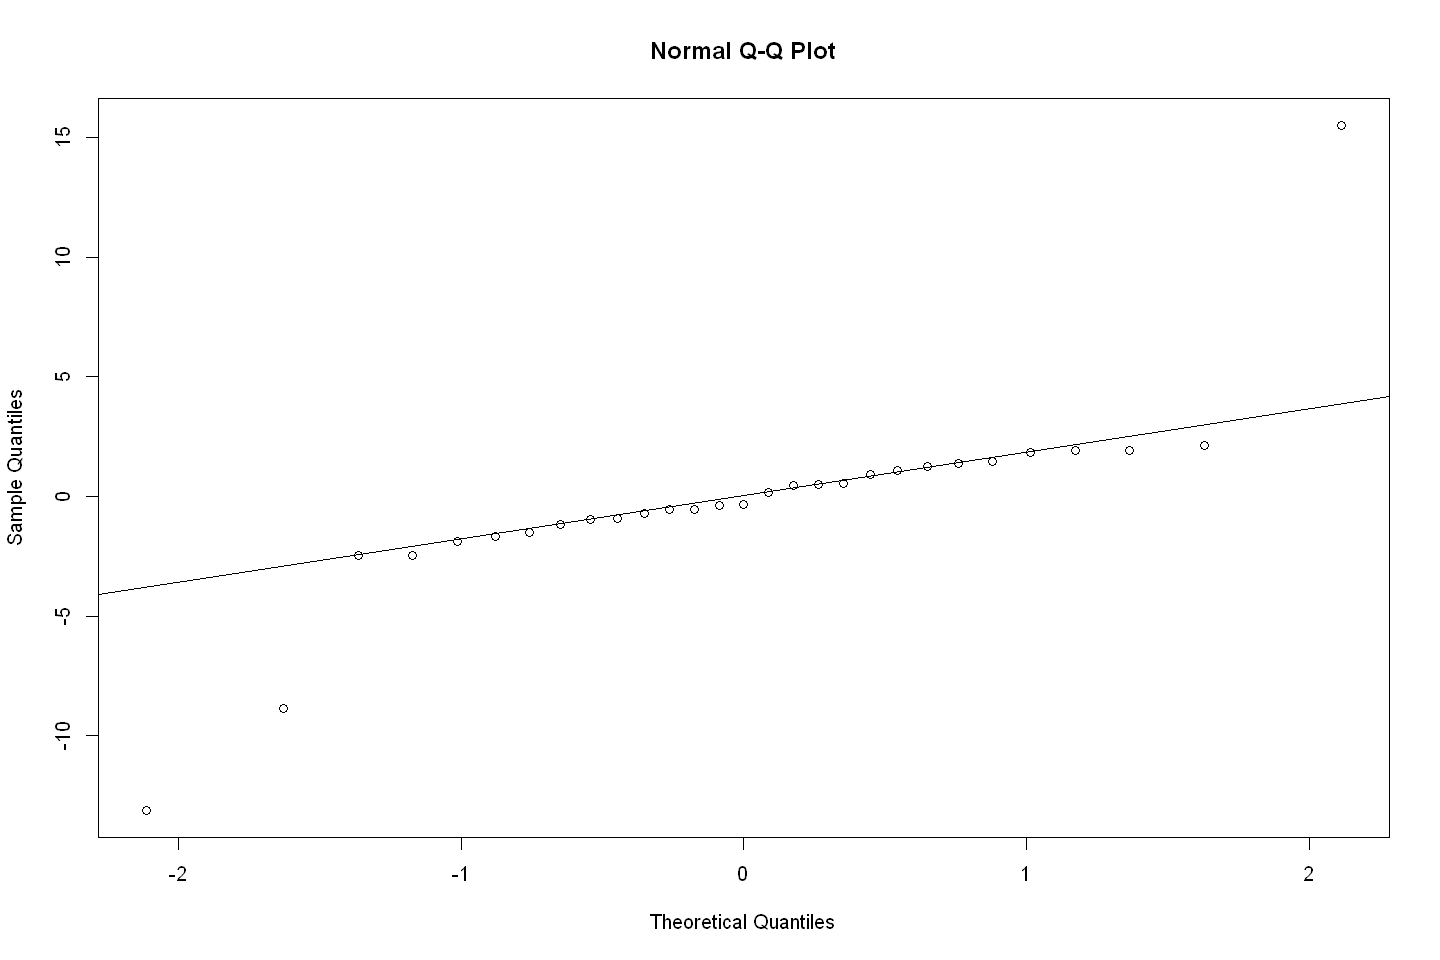

In [58]:
qqnorm(residuals(final_model))
qqline(residuals(final_model))

Většina bodů leží na přímce na Q-Q plotu, ale problémem jsou stále odlehlé hodnoty.

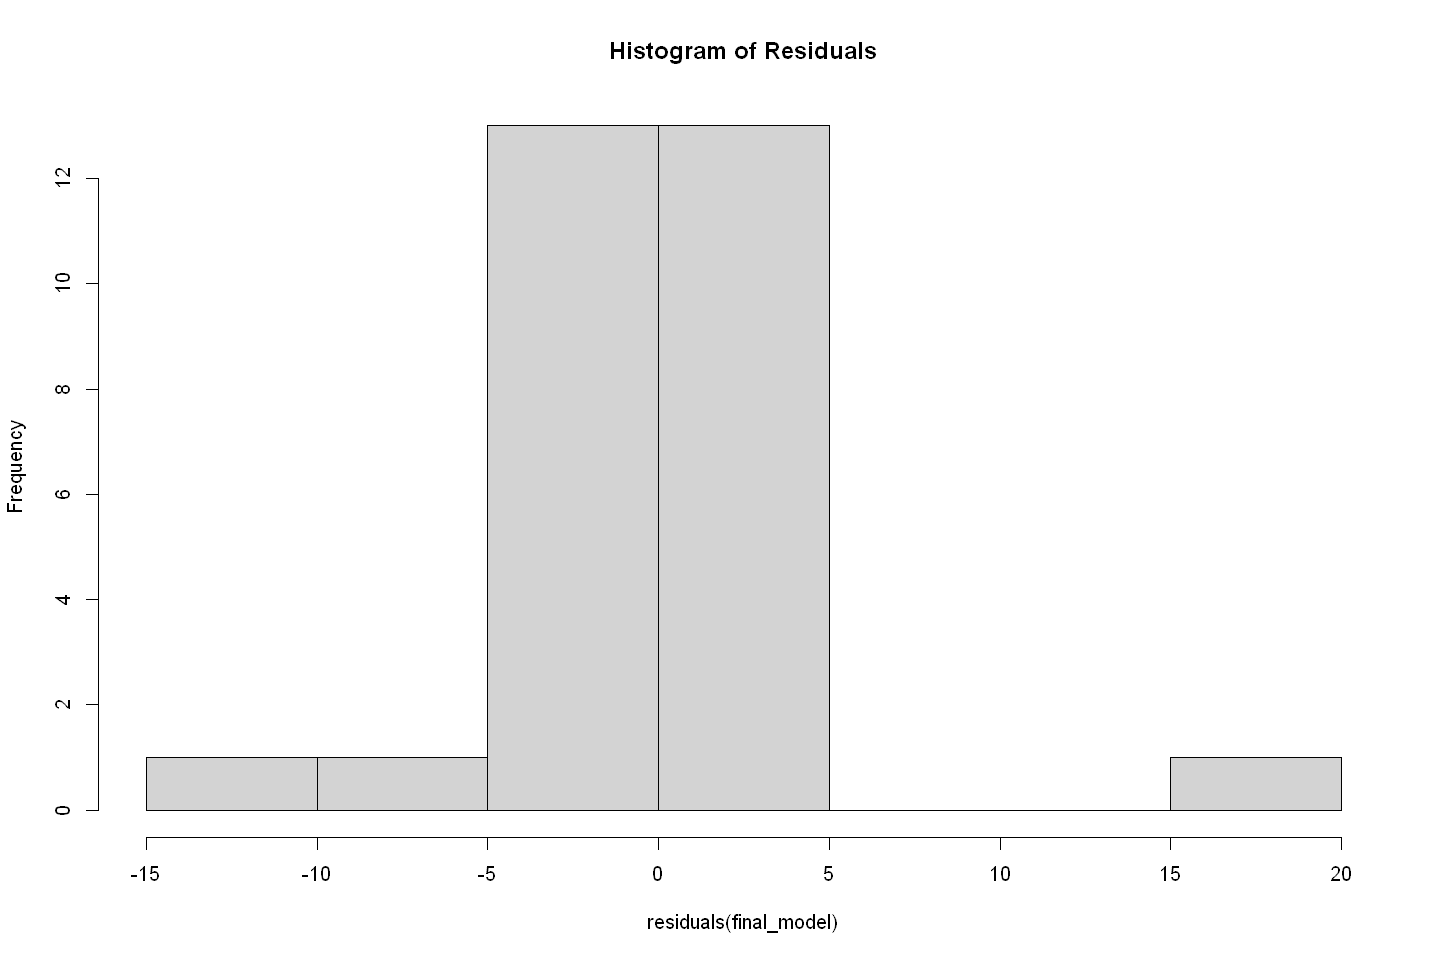

In [59]:
hist(residuals(final_model), main = "Histogram of Residuals")

Ideálně by histogram měl být přibližně normální, což v našem případě se bohužel nestalo. Vizulálně výpadá jako Gaussian, ale s mezerami. 

### Ověření linearity

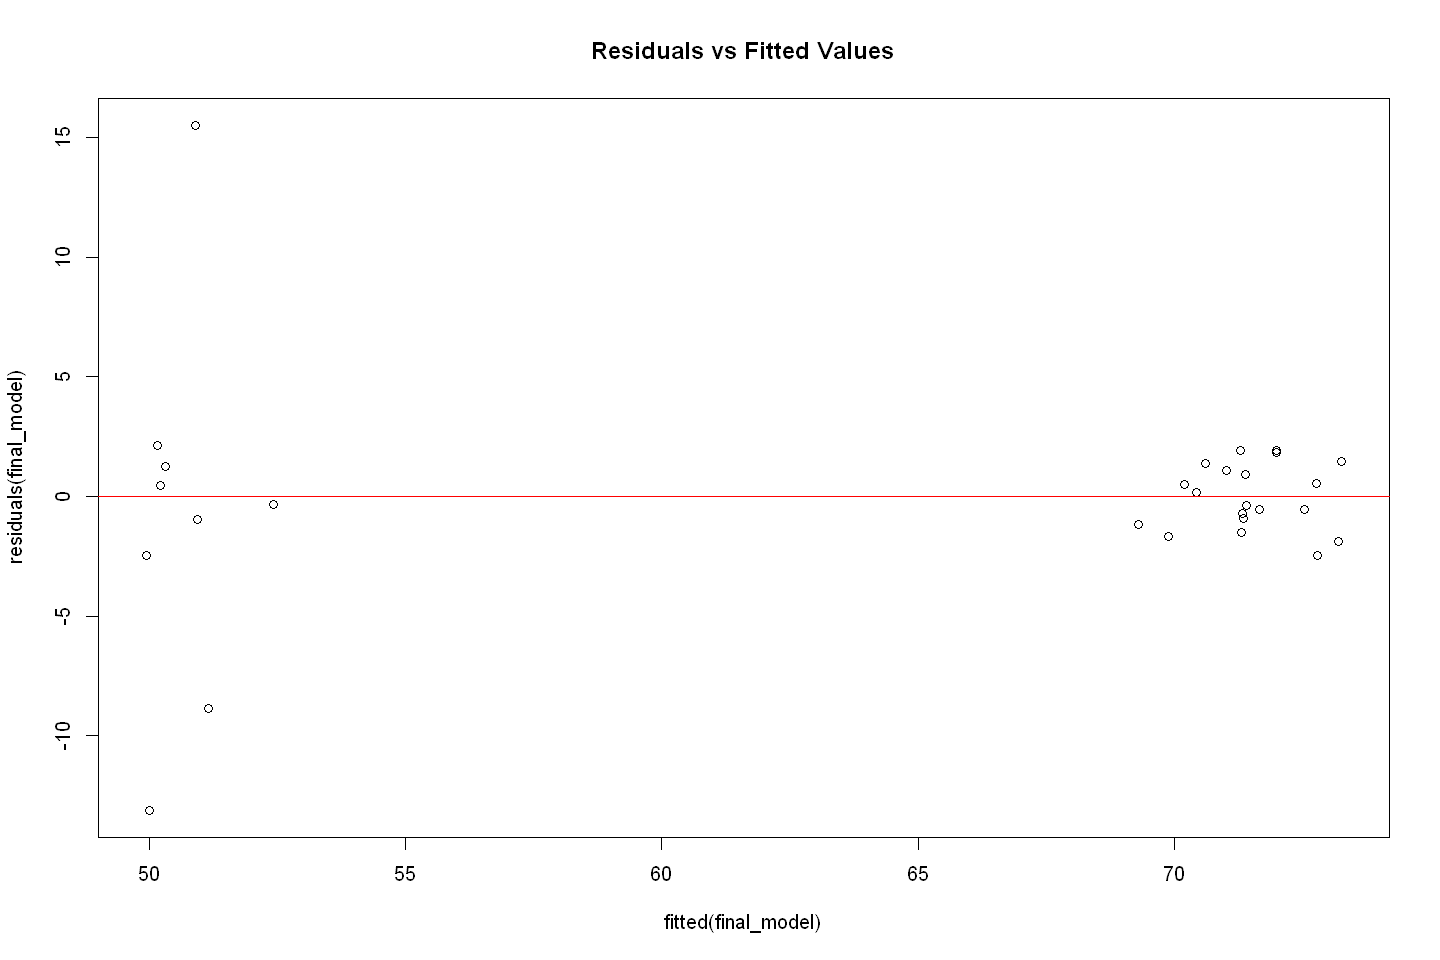

In [60]:
plot(fitted(final_model), residuals(final_model), main = "Residuals vs Fitted Values")
abline(h = 0, col = "red")

Ideálně bylo by, pokud by body v scatterplotu byly rovnoměrně rozptýleny kolem horizontální čáry nulových reziduí. Ale vidím z plotu, že červená přímka ideálně rovně leží.

### Ověření homoskedasticity

In [61]:
bptest(final_model)


	studentized Breusch-Pagan test

data:  final_model
BP = 5.9893, df = 2, p-value = 0.05005


Protože p-hodnota (0.05005) je vyšší než 0.05 na hladině významnosti 5%, nulovou hypotézu o homoskedasticitě nezamítáme. To naznačuje, že neexistuje silný důkaz pro závěr, že rozptyl reziduí není konstantní na všech úrovních nezávislých proměnných. Stojí však za povšimnutí, že p-hodnota se blíží 0.05, což naznačuje hraniční významnost. 

### Ověření multikolinearity

In [62]:
vif(final_model)

Type   Income 
1.259966 1.259966

Ve našem případě mají obě predikční proměnné hodnotu VIF přibližně 1,26. Tyto hodnoty jsou hluboko pod prahovou hodnotou 5, což naznačuje, že multikolinearita není ve našem modelu významným problémem.

Nízké hodnoty VIF naznačují, že predikční proměnné nejsou vzájemně vysoce korelované, což je žádoucí pro interpretaci jednotlivých účinků jednotlivých prediktorů na proměnnou odezvy.

### Ověření nezávislosti reziduí

In [63]:
dw_test <- dwtest(final_model)
dw_test


	Durbin-Watson test

data:  final_model
DW = 1.6622, p-value = 0.1384
alternative hypothesis: true autocorrelation is greater than 0


S p-hodnotou 0,1384 při hladině významnosti 0,05 se nám nepodařilo zamítnout nulovou hypotézu o neexistenci autokorelace. DW hodnota se rovna 1.6. Hodnota blízká 2 naznačuje absenci autokorelace, zatímco hodnoty výrazně odlišné od 2 naznačují přítomnost autokorelace.

Všechny tyto testy lze provést bez splnění předpokladu normality, ale musíme správně interpretovat. Náš finální model nesplnuje všechny testy, proto nemůžeme mu důvěřovat na 100%.